In [5]:
## Negative Externalities of Freight/Cargo Transportation in LA County
## This notebook explores sociodemographic characteristics within LA County. Project by Alejandra Rio, Georgie Suico, Yu-Chen Chu, & Matthews Cribioli.

# Health Metrics

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

## Importing data

In [2]:
# load data file
# specify FIPS, state, and county data as strings to keep the leading zero
df = pd.read_csv(
    'Data/AcsDataAle.csv',
    dtype=
    {
        'Geo_FIPS':str,
        'Geo_STATE':str,
        'Geo_COUNTY': str
    }
)

## Observing data

In [3]:
# number or rows and columns
df.shape

(2498, 435)

In [4]:
#first 5 rows
df.head()

Geo_FIPS                                          Geo_QName Geo_FILEID  \
0  06037101110  Census Tract 1011.10, Los Angeles County, Cali...      ACSSF   
1  06037101122  Census Tract 1011.22, Los Angeles County, Cali...      ACSSF   
2  06037101220  Census Tract 1012.20, Los Angeles County, Cali...      ACSSF   
3  06037101221  Census Tract 1012.21, Los Angeles County, Cali...      ACSSF   
4  06037101222  Census Tract 1012.22, Los Angeles County, Cali...      ACSSF   

  Geo_STUSAB  Geo_SUMLEV  Geo_GEOCOMP  Geo_LOGRECNO  Geo_US  Geo_REGION  \
0         ca         140            0          4200     NaN         NaN   
1         ca         140            0          4201     NaN         NaN   
2         ca         140            0          4202     NaN         NaN   
3         ca         140            0          4203     NaN         NaN   
4         ca         140            0          4204     NaN         NaN   

   Geo_DIVISION  ...  PCT_SE_A10030_003 PCT_SE_A10030_004 PCT_SE_A10030_005  \
0           NaN  ...              26.64             43.57             13.65   
1           NaN  ...              20.26             43.22             22.81   
2           NaN  ...              27.86             44.80             12.75   
3           NaN  ...              35.24             36.28              6.21   
4           NaN  ...              31.02             41.60              2.99   

   PCT_SE_A10030_006  PCT_SE_A10030_007  SE_B18002_001  SE_B18002_002  \
0               2.61               0.67            644            179   
1               8.82               4.23            344            181   
2               7.07               2.14            762            198   
3               5.86               1.59           1140            346   
4               3.42               0.00            816             44   

   SE_B18002_003  PCT_SE_B18002_002  PCT_SE_B18002_003  
0            175              27.80              27.17  
1             62              52.62              18.02  
2            210              25.98              27.56  
3            410              30.35              35.96  
4            488               5.39              59.80  

[5 rows x 435 columns]

In [5]:
# data types
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 435 columns):
 #    Column              Non-Null Count  Dtype  
---   ------              --------------  -----  
 0    Geo_FIPS            2498 non-null   object 
 1    Geo_QName           2498 non-null   object 
 2    Geo_FILEID          2498 non-null   object 
 3    Geo_STUSAB          2498 non-null   object 
 4    Geo_SUMLEV          2498 non-null   int64  
 5    Geo_GEOCOMP         2498 non-null   int64  
 6    Geo_LOGRECNO        2498 non-null   int64  
 7    Geo_US              0 non-null      float64
 8    Geo_REGION          0 non-null      float64
 9    Geo_DIVISION        0 non-null      float64
 10   Geo_STATECE         0 non-null      float64
 11   Geo_STATE           2498 non-null   object 
 12   Geo_COUNTY          2498 non-null   object 
 13   Geo_COUSUB          0 non-null      float64
 14   Geo_PLACE           0 non-null      float64
 15   Geo_TRACT           2498 non-null   

## Delete Null Data

In [6]:
df.columns[df.isna().all()].tolist()

['Geo_US',
 'Geo_REGION',
 'Geo_DIVISION',
 'Geo_STATECE',
 'Geo_COUSUB',
 'Geo_PLACE',
 'Geo_BLKGRP',
 'Geo_CONCIT',
 'Geo_AIANHH',
 'Geo_AIANHHFP',
 'Geo_AIHHTLI',
 'Geo_AITSCE',
 'Geo_AITS',
 'Geo_ANRC',
 'Geo_CBSA',
 'Geo_CSA',
 'Geo_METDIV',
 'Geo_MACC',
 'Geo_MEMI',
 'Geo_NECTA',
 'Geo_CNECTA',
 'Geo_NECTADIV',
 'Geo_UA',
 'Geo_UACP',
 'Geo_CDCURR',
 'Geo_SLDU',
 'Geo_SLDL',
 'Geo_VTD',
 'Geo_ZCTA3',
 'Geo_ZCTA5',
 'Geo_SUBMCD',
 'Geo_SDELM',
 'Geo_SDSEC',
 'Geo_SDUNI',
 'Geo_UR',
 'Geo_PCI',
 'Geo_TAZ',
 'Geo_UGA',
 'Geo_PUMA5',
 'Geo_PUMA1',
 'Geo_BTTR',
 'Geo_BTBG',
 'Geo_PLACESE']

In [7]:
df = df.dropna(axis=1,how="all")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Columns: 392 entries, Geo_FIPS to PCT_SE_B18002_003
dtypes: float64(184), int64(200), object(8)
memory usage: 7.5+ MB


In [9]:
df.head()

Geo_FIPS                                          Geo_QName Geo_FILEID  \
0  06037101110  Census Tract 1011.10, Los Angeles County, Cali...      ACSSF   
1  06037101122  Census Tract 1011.22, Los Angeles County, Cali...      ACSSF   
2  06037101220  Census Tract 1012.20, Los Angeles County, Cali...      ACSSF   
3  06037101221  Census Tract 1012.21, Los Angeles County, Cali...      ACSSF   
4  06037101222  Census Tract 1012.22, Los Angeles County, Cali...      ACSSF   

  Geo_STUSAB  Geo_SUMLEV  Geo_GEOCOMP  Geo_LOGRECNO Geo_STATE Geo_COUNTY  \
0         ca         140            0          4200        06        037   
1         ca         140            0          4201        06        037   
2         ca         140            0          4202        06        037   
3         ca         140            0          4203        06        037   
4         ca         140            0          4204        06        037   

   Geo_TRACT  ... PCT_SE_A10030_003 PCT_SE_A10030_004  PCT_SE_A10030_005  \
0     101110  ...             26.64             43.57              13.65   
1     101122  ...             20.26             43.22              22.81   
2     101220  ...             27.86             44.80              12.75   
3     101221  ...             35.24             36.28               6.21   
4     101222  ...             31.02             41.60               2.99   

   PCT_SE_A10030_006  PCT_SE_A10030_007  SE_B18002_001  SE_B18002_002  \
0               2.61               0.67            644            179   
1               8.82               4.23            344            181   
2               7.07               2.14            762            198   
3               5.86               1.59           1140            346   
4               3.42               0.00            816             44   

   SE_B18002_003  PCT_SE_B18002_002  PCT_SE_B18002_003  
0            175              27.80              27.17  
1             62              52.62              18.02  
2            210              25.98              27.56  
3            410              30.35              35.96  
4            488               5.39              59.80  

[5 rows x 392 columns]

## Cleaning up data with desired columns

In [39]:
# define columns to keep
columns_to_keep = ['Geo_FIPS',
                   #insurance
                   'SE_A20001_003',
                   'PCT_SE_A20001_003',
                   #no insurance
                   'SE_A20001_002',
                   'PCT_SE_A20001_002',
                   #public insurance
                   'SE_A20001_004',
                   'PCT_SE_A20001_004',
                   #private insurance
                   'SE_A20001_005',
                   'PCT_SE_A20001_005',
                   #means of transportation (commuting) car
                   'SE_A09005_002',
                   'PCT_SE_A09005_002',
                   #means of transportation (commuting) public transit
                   'SE_A09005_003',
                   'PCT_SE_A09005_003',
                    #means of transportation (commuting) motorcycle
                   'SE_A09005_004',
                   'PCT_SE_A09005_004',
                  #means of transportation (commuting) bicycle
                   'SE_A09005_005',
                   'PCT_SE_A09005_005',
                  #means of transportation (commuting) walked
                   'SE_A09005_006',
                   'PCT_SE_A09005_006', 
                  #means of transportation (commuting) other
                   'SE_A09005_007',
                   'PCT_SE_A09005_007']
# add it to a new dataframe
df2 = df[columns_to_keep]

## Renaming columns

In [40]:
columns = list(df2) 
columns

['Geo_FIPS',
 'SE_A20001_003',
 'PCT_SE_A20001_003',
 'SE_A20001_002',
 'PCT_SE_A20001_002',
 'SE_A20001_004',
 'PCT_SE_A20001_004',
 'SE_A20001_005',
 'PCT_SE_A20001_005',
 'SE_A09005_002',
 'PCT_SE_A09005_002',
 'SE_A09005_003',
 'PCT_SE_A09005_003',
 'SE_A09005_004',
 'PCT_SE_A09005_004',
 'SE_A09005_005',
 'PCT_SE_A09005_005',
 'SE_A09005_006',
 'PCT_SE_A09005_006',
 'SE_A09005_007',
 'PCT_SE_A09005_007']

In [42]:
df2.columns = ['FIPS',
 'insurance',
 '% insurance',
 'no insurance',
 '% no insurance',
 'public insurance',
 '% public insurance',
 'private insurance',
 '% private insurance',
 'transportation-car',
 '% transportation-car',
 'transportation-publictransit',
 '% transportation-publictransit',
 'transportation-motorcycle',
 '% transportation-motorcycle',
 'transportation-bicycle',
 '% transportation-bicycle',
 'transportation-walked',
 '% transportation-walked',
 'transportation-other',
 '% transportation-other']

In [43]:
df2.sample(5)

FIPS  insurance  % insurance  no insurance  % no insurance  \
587   06037206202       1763        96.13            71            3.87   
77    06037109601       4354        89.79           495           10.21   
791   06037228800       4157        76.47          1279           23.53   
2248  06037700901       3865        97.38           104            2.62   
1093  06037297201       3975        89.91           446           10.09   

      public insurance  % public insurance  private insurance  \
587               1124               61.29                951   
77                1444               29.78               3217   
791               2925               53.81               1472   
2248               821               20.69               3349   
1093              1815               41.05               2365   

      % private insurance  transportation-car  ...  \
587                 51.85                 403  ...   
77                  66.34                2145  ...   
791                 27.08                2015  ...   
2248                84.38                1457  ...   
1093                53.49                1781  ...   

      transportation-publictransit  % transportation-publictransit  \
587                            193                           24.68   
77                              21                            0.86   
791                            359                           14.85   
2248                            56                            3.08   
1093                           116                            5.40   

      transportation-motorcycle  % transportation-motorcycle  \
587                           0                          0.0   
77                            0                          0.0   
791                           0                          0.0   
2248                          0                          0.0   
1093                          0                          0.0   

      transportation-bicycle  % transportation-bicycle  transportation-walked  \
587                        0                       0.0                     47   
77                         0                       0.0                     54   
791                        0                       0.0                     32   
2248                       0                       0.0                     48   
1093                       0                       0.0                     76   

      % transportation-walked  transportation-other  % transportation-other  
587                      6.01                     0                    0.00  
77                       2.22                    29                    1.19  
791                      1.32                    11                    0.46  
2248                     2.64                     6                    0.33  
1093                     3.54                     0                    0.00  

[5 rows x 21 columns]

## Charts from data

### Chart for top 10 census tracts in LA county for 'no insurance'

In [65]:
df_sorted = df2.sort_values(by='no insurance',ascending = False)

In [66]:
df_sorted[['FIPS','no insurance']].head(10)

FIPS  no insurance
1740  06037535101          1827
632   06037209402          1771
1691  06037532900          1624
2421  06037920047          1534
497   06037192520          1482
1695  06037533104          1430
1447  06037433901          1401
678   06037212900          1375
1142  06037302401          1337
622   06037208903          1337

<AxesSubplot: title={'center': 'Top 10 Census Tracts with Highest Levels of People with No Insurance in Los Angeles County in 2021'}, ylabel='FIPS'>

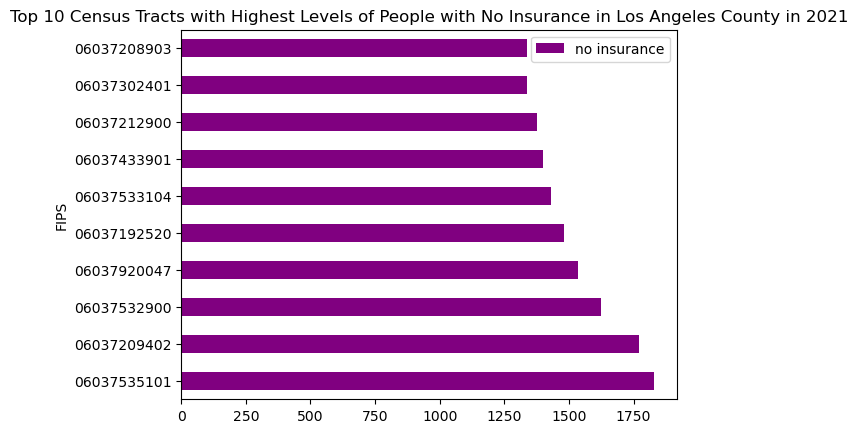

In [69]:
df_sorted.head(10).plot.barh(x='FIPS',
                            y='no insurance', 
                            title='Top 10 Census Tracts with Highest Levels of People with No Insurance in Los Angeles County in 2021',
                            color='purple')

### Scatterplot for no insurance vs insurance

<AxesSubplot: xlabel='no insurance', ylabel='insurance'>

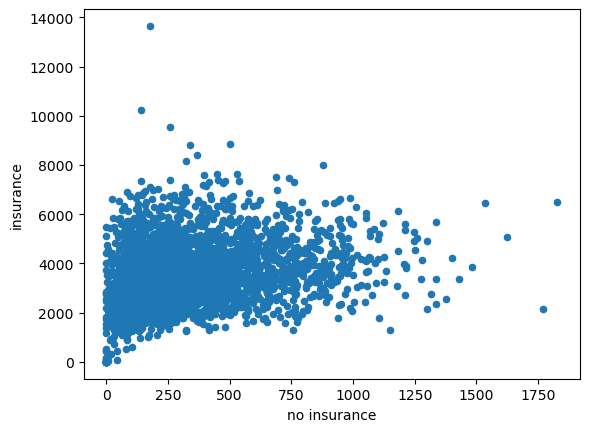

In [70]:
df2.plot.scatter(x='no insurance',y='insurance')

### scatterplot for commuting by public transit vs car 

<AxesSubplot: xlabel='transportation-publictransit', ylabel='transportation-car'>

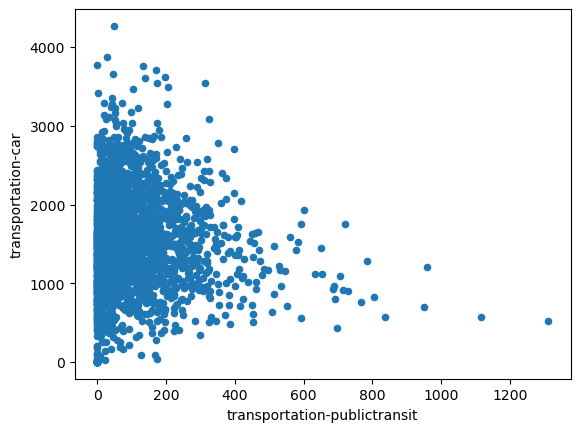

In [73]:
df2.plot.scatter(x='transportation-publictransit',y='transportation-car')

## Adding geographic data

In [45]:
# read in a geojson file downloaded from the LA Times
tracts=gpd.read_file('Data/Census_Tracts_2020.geojson')
tracts.head()

OBJECTID    CT20    LABEL   ShapeSTArea  ShapeSTLength  \
0         1  101110  1011.10  1.229562e+07   15083.854287   
1         2  101122  1011.22  2.845774e+07   31671.455844   
2         3  101220  1012.20  7.522093e+06   12698.783810   
3         4  101221  1012.21  3.812000e+06    9161.710543   
4         5  101222  1012.22  3.191371e+06    9980.600461   

                                            geometry  
0  POLYGON ((-118.28491 34.25948, -118.28492 34.2...  
1  POLYGON ((-118.29015 34.27417, -118.29015 34.2...  
2  POLYGON ((-118.28100 34.25592, -118.28198 34.2...  
3  POLYGON ((-118.28735 34.25591, -118.28863 34.2...  
4  POLYGON ((-118.28594 34.25405, -118.28594 34.2...

<AxesSubplot: >

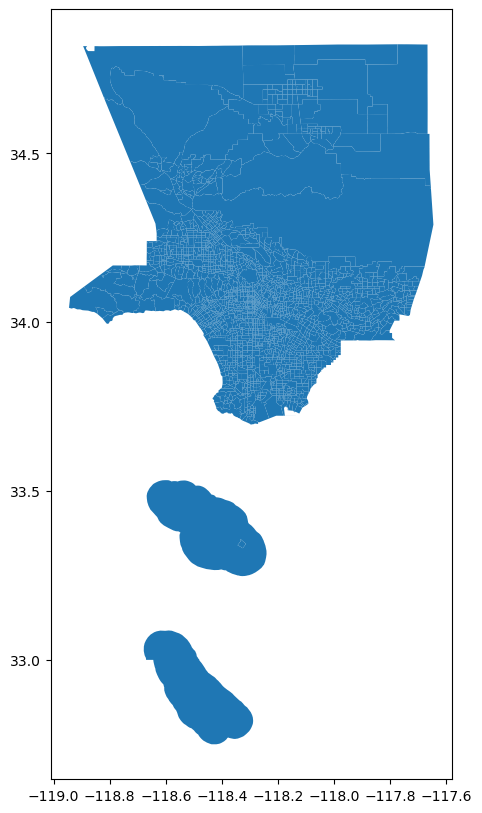

In [16]:
tracts.plot(figsize=(12,10))

In [46]:
tracts.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2495 entries, 0 to 2494
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   OBJECTID       2495 non-null   int64   
 1   CT20           2495 non-null   object  
 2   LABEL          2495 non-null   object  
 3   ShapeSTArea    2495 non-null   float64 
 4   ShapeSTLength  2495 non-null   float64 
 5   geometry       2495 non-null   geometry
dtypes: float64(2), geometry(1), int64(1), object(2)
memory usage: 117.1+ KB


In [47]:
tracts = tracts[['CT20','geometry']]
tracts.head()

CT20                                           geometry
0  101110  POLYGON ((-118.28491 34.25948, -118.28492 34.2...
1  101122  POLYGON ((-118.29015 34.27417, -118.29015 34.2...
2  101220  POLYGON ((-118.28100 34.25592, -118.28198 34.2...
3  101221  POLYGON ((-118.28735 34.25591, -118.28863 34.2...
4  101222  POLYGON ((-118.28594 34.25405, -118.28594 34.2...

## Adding leading zeros to data

In [48]:
tracts['FIPS'] ='06' + '037' + tracts['CT20']

In [49]:
tracts.head()

CT20                                           geometry         FIPS
0  101110  POLYGON ((-118.28491 34.25948, -118.28492 34.2...  06037101110
1  101122  POLYGON ((-118.29015 34.27417, -118.29015 34.2...  06037101122
2  101220  POLYGON ((-118.28100 34.25592, -118.28198 34.2...  06037101220
3  101221  POLYGON ((-118.28735 34.25591, -118.28863 34.2...  06037101221
4  101222  POLYGON ((-118.28594 34.25405, -118.28594 34.2...  06037101222

## Merging data

In [50]:
tracts_data=tracts.merge(df2,on="FIPS")

In [51]:
tracts_data.head()

CT20                                           geometry         FIPS  \
0  101110  POLYGON ((-118.28491 34.25948, -118.28492 34.2...  06037101110   
1  101122  POLYGON ((-118.29015 34.27417, -118.29015 34.2...  06037101122   
2  101220  POLYGON ((-118.28100 34.25592, -118.28198 34.2...  06037101220   
3  101221  POLYGON ((-118.28735 34.25591, -118.28863 34.2...  06037101221   
4  101222  POLYGON ((-118.28594 34.25405, -118.28594 34.2...  06037101222   

   insurance  % insurance  no insurance  % no insurance  public insurance  \
0       3590        94.32           216            5.68              1609   
1       4081        96.18           162            3.82              1371   
2       3265        91.12           318            8.88              1506   
3       3310        89.80           376           10.20              1772   
4       2403        89.33           287           10.67              1308   

   % public insurance  private insurance  ...  transportation-publictransit  \
0               42.28               2503  ...                            60   
1               32.31               3084  ...                            18   
2               42.03               2057  ...                           100   
3               48.07               1803  ...                            61   
4               48.62               1201  ...                            33   

   % transportation-publictransit  transportation-motorcycle  \
0                            3.10                         15   
1                            0.91                          0   
2                            5.79                          0   
3                            3.68                          0   
4                            3.02                          0   

   % transportation-motorcycle  transportation-bicycle  \
0                         0.77                       0   
1                         0.00                       0   
2                         0.00                       0   
3                         0.00                       0   
4                         0.00                       0   

   % transportation-bicycle  transportation-walked  % transportation-walked  \
0                       0.0                     14                     0.72   
1                       0.0                      0                     0.00   
2                       0.0                     32                     1.85   
3                       0.0                      0                     0.00   
4                       0.0                     45                     4.12   

   transportation-other  % transportation-other  
0                     2                    0.10  
1                    77                    3.89  
2                    93                    5.39  
3                   112                    6.76  
4                     0                    0.00  

[5 rows x 23 columns]

## Mapping data for insurance

### No insurance

<AxesSubplot: >

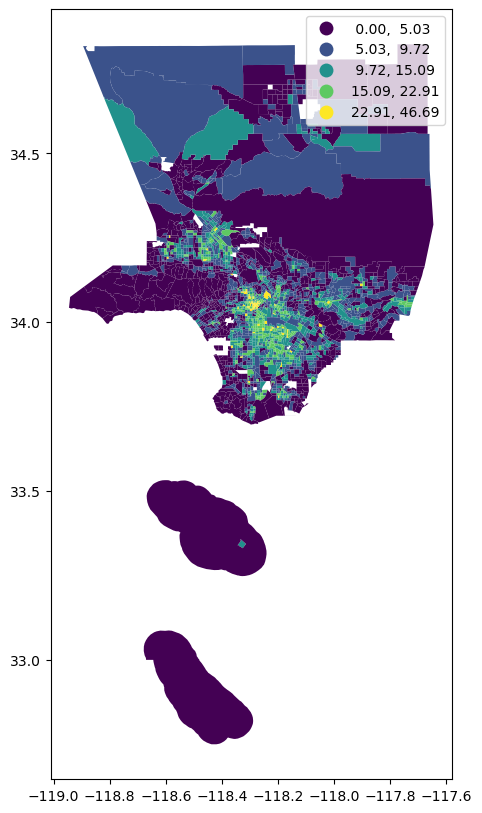

In [52]:
tracts_data.plot(figsize=(12,10),
                 column='% no insurance',
                 legend=True, 
                 scheme='NaturalBreaks')

### Insurance

<AxesSubplot: >

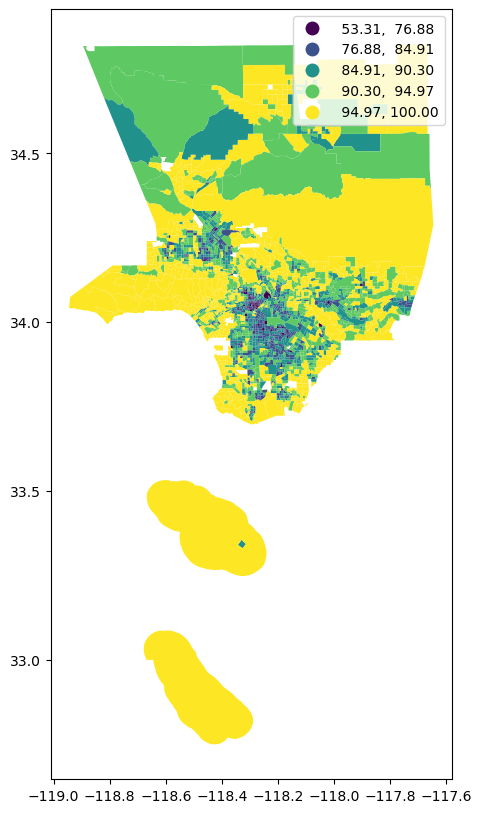

In [53]:
tracts_data.plot(figsize=(12,10),
                 column='% insurance',
                 legend=True, 
                 scheme='NaturalBreaks')

### Insurance, public

<AxesSubplot: >

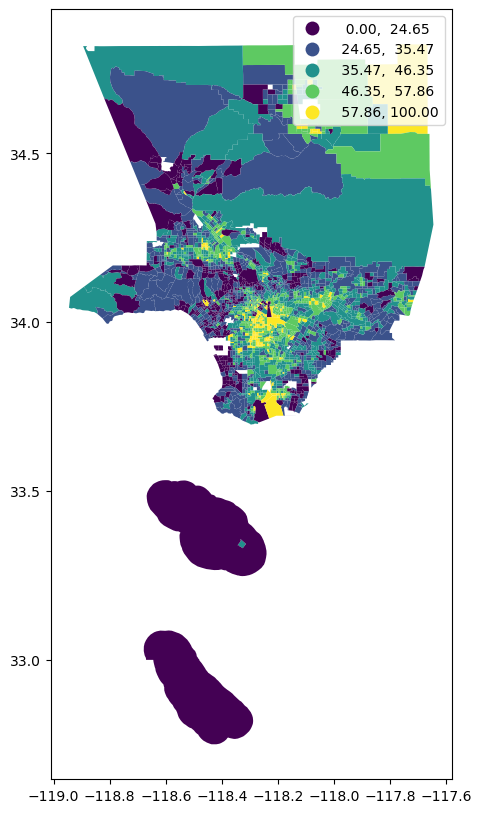

In [54]:
tracts_data.plot(figsize=(12,10),
                 column='% public insurance',
                 legend=True, 
                 scheme='NaturalBreaks')

### Insurance, private

<AxesSubplot: >

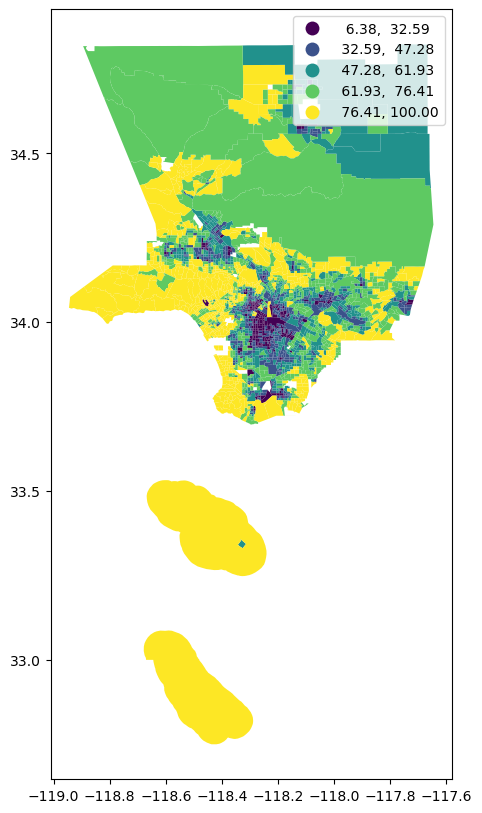

In [55]:
tracts_data.plot(figsize=(12,10),
                 column='% private insurance',
                 legend=True, 
                 scheme='NaturalBreaks')

## Mapping for commuting transportation modes

### Commuting by car

<AxesSubplot: >

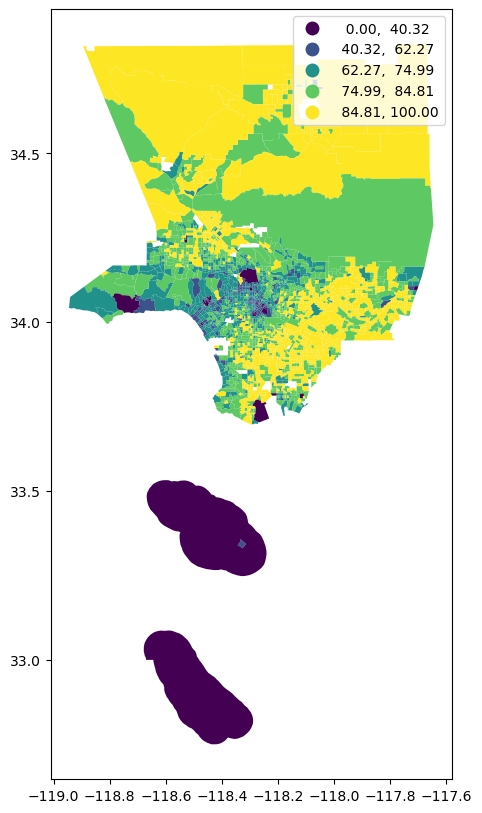

In [58]:
tracts_data.plot(figsize=(12,10),
                 column='% transportation-car',
                 legend=True,
                 scheme='NaturalBreaks')

### Commuting by public transit

<AxesSubplot: >

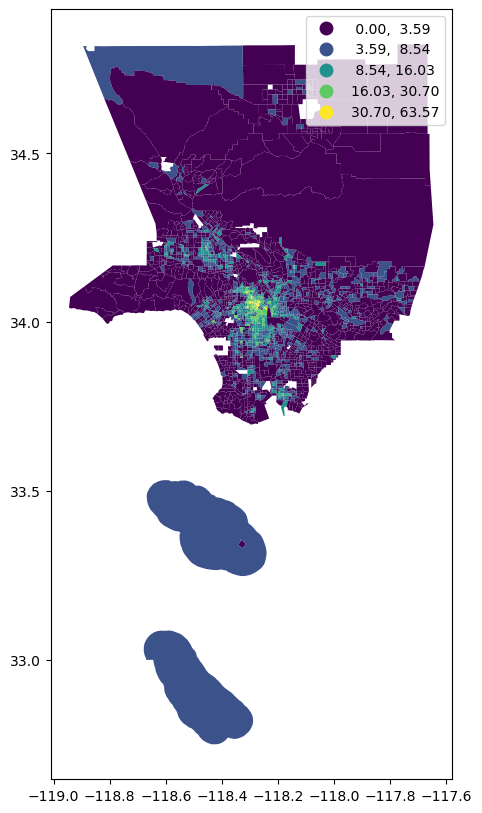

In [60]:
tracts_data.plot(figsize=(12,10),
                 column='% transportation-publictransit',
                 legend=True,
                 scheme='NaturalBreaks')

### Commuting by motorcycle

<AxesSubplot: >

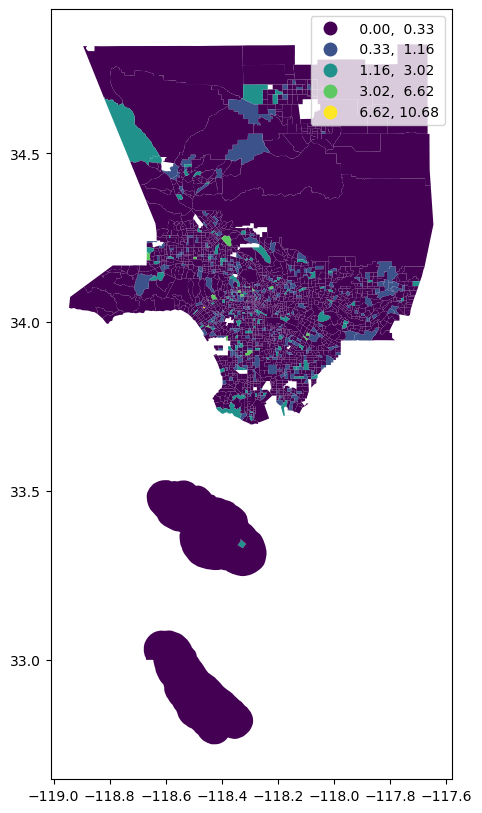

In [61]:
tracts_data.plot(figsize=(12,10),
                 column='% transportation-motorcycle',
                 legend=True,
                 scheme='NaturalBreaks')

### Commuting by bicycle

<AxesSubplot: >

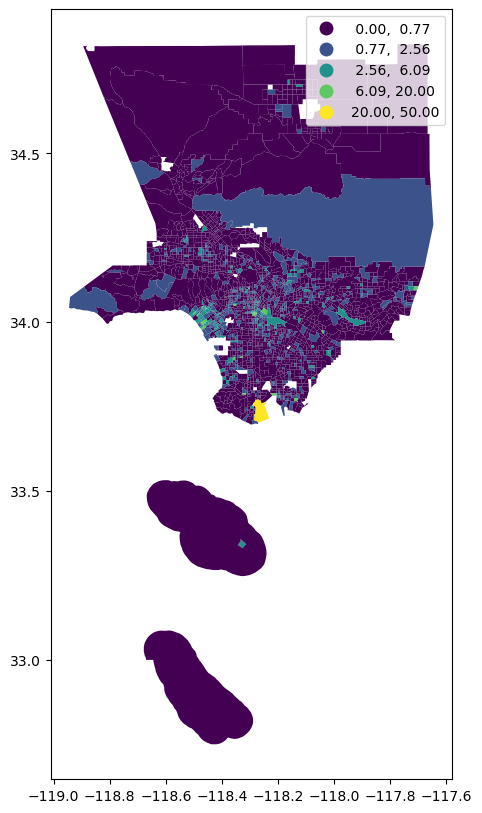

In [62]:
tracts_data.plot(figsize=(12,10),
                 column='% transportation-bicycle',
                 legend=True,
                 scheme='NaturalBreaks')

### Commuting by walking

<AxesSubplot: >

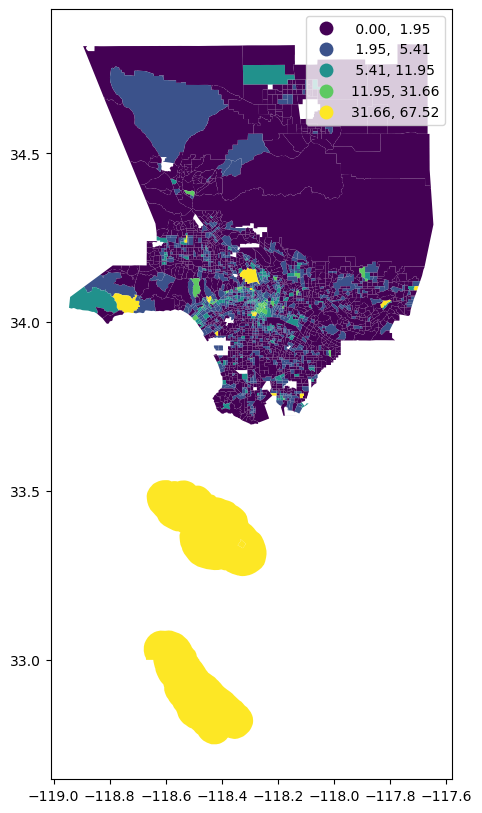

In [63]:
tracts_data.plot(figsize=(12,10),
                 column='% transportation-walked',
                 legend=True,
                 scheme='NaturalBreaks')

### Commuting by other modes of transportation 

<AxesSubplot: >

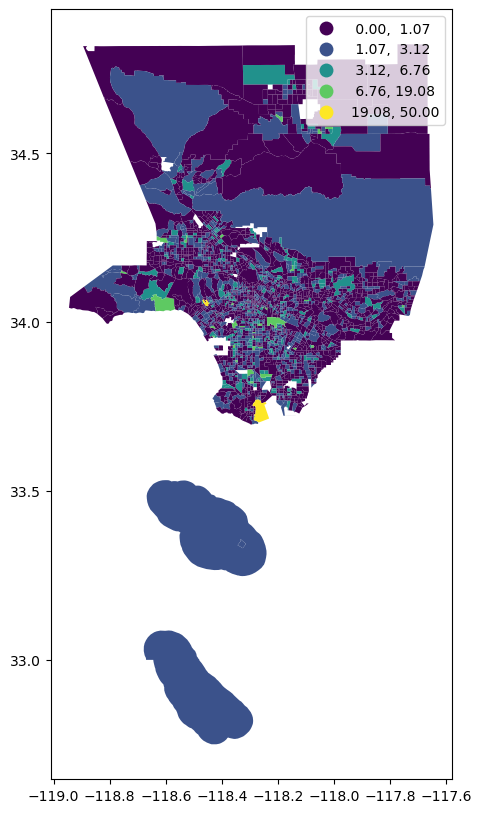

In [64]:
tracts_data.plot(figsize=(12,10),
                 column='% transportation-other',
                 legend=True,
                 scheme='NaturalBreaks')

# **Race & Ethnicity** 

In [1]:
import pandas as pd
import geopandas as gpd

In [2]:
#import census data
census = pd.read_csv('Data/ACS21_Race_Socal_.csv',
        dtype=
        {
            'Geo_FIPS':str,
            'Geo_STATE':str,
            'Geo_COUNTY': str
        }
)

In [3]:
census = census.dropna(axis=1,how="all")

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

columns_to_keep =['Geo_FIPS',
 'SE_A04001_001',
 'SE_A04001_002',
 'SE_A04001_003',
 'SE_A04001_004',
 'SE_A04001_005',
 'SE_A04001_006',
 'SE_A04001_007',
 'SE_A04001_008',
 'SE_A04001_009',
 'SE_A04001_010',
 'SE_A04001_011',
 'SE_A04001_012',
 'SE_A04001_013',
 'SE_A04001_014',
 'SE_A04001_015',
 'SE_A04001_016',
 'SE_A04001_017'] 

census_race = census[columns_to_keep]

      Geo_FIPS  SE_A04001_001  SE_A04001_002  SE_A04001_003  SE_A04001_004  \
0  06025010101           4207           1616            348           1043   
1  06025010102           3903            744            268            325   
2  06025010200           2765            349            304             13   
3  06025010300            918            403            392              0   
4  06025010401           2346            119             96              3   

   SE_A04001_005  SE_A04001_006  SE_A04001_007  SE_A04001_008  SE_A04001_009  \
0             70             20              6              7            122   
1              0            120             31              0              0   
2              0             11              0              0             21   
3              0              0              3              0              8   
4              0             13              7              0              0   

   SE_A04001_010  SE_A04001_011  SE_A04001_012  SE

In [6]:
#rename column titles
census_race.columns = ['Geo_FIPS',
 'Total Population',
 'Not Hispanic or Latino',
 'Not Hispanic and White Alone',
 'Not Hispanic and Black or African American Alone',
 'Not Hispanic and American Indian and Alaska Native Alone',
 'Not Hispanic and Asian Alone',
 'Not Hispanic and Native Hawaiian and Other Pacific Islander Alone',
 'Not Hispanic and Some Other Race Alone',
 'Not Hispanic and Two or More Races',
 'Hispanic or Latino',
 'Hispanic and White Alone',
 'Hispanic and Black or African American Alone',
 'Hispanic and American Indian and Alaska Native Alone',
 'Hispanic and Asian Alone',
 'Hispanic and Native Hawaiian and Other Pacific Islander Alone',
 'Hispanic and Some Other Race Alone',
 'Hispanic and Two or More Races'] 
print(census_race.head())

      Geo_FIPS  Total Population  Not Hispanic or Latino  \
0  06025010101              4207                    1616   
1  06025010102              3903                     744   
2  06025010200              2765                     349   
3  06025010300               918                     403   
4  06025010401              2346                     119   

   Not Hispanic and White Alone  \
0                           348   
1                           268   
2                           304   
3                           392   
4                            96   

   Not Hispanic and Black or African American Alone  \
0                                              1043   
1                                               325   
2                                                13   
3                                                 0   
4                                                 3   

   Not Hispanic and American Indian and Alaska Native Alone  \
0                                 

In [7]:
#import shapefile of 2020 california census tracts, rename and keep only FIPS and Geometry
tracts=gpd.read_file('Data/2020_Census_Tracts/tl_2022_06_tract.shp')
tracts=tracts[['GEOID','geometry']]
tracts.rename(columns = {'GEOID':'Geo_FIPS'}, inplace = True)
tracts.head()

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


Geo_FIPS                                           geometry
0  06037137504  POLYGON ((-118.58119 34.14318, -118.58099 34.1...
1  06037138000  POLYGON ((-118.60573 34.14585, -118.60561 34.1...
2  06037139200  POLYGON ((-118.53082 34.18024, -118.52952 34.1...
3  06087120901  POLYGON ((-122.04607 37.07105, -122.04505 37.0...
4  06087120902  POLYGON ((-122.02513 37.04320, -122.02500 37.0...

In [8]:
#Merge census data and census tract shapefile
census_tracts_race=tracts.merge(census_race,on="Geo_FIPS")

In [9]:
census_tracts_race['percent Hispanic or Latino'] = (census_tracts_race['Hispanic or Latino'] / 
                  census_tracts_race['Total Population']) * 100
census_tracts_race['percent Not Hispanic and White Alone'] = (census_tracts_race['Not Hispanic and White Alone'] / 
                  census_tracts_race['Total Population']) * 100
census_tracts_race['percent Not Hispanic and Black or African American Alone'] = (census_tracts_race['Not Hispanic and Black or African American Alone'] / 
                  census_tracts_race['Total Population']) * 100
census_tracts_race['percent Not Hispanic and American Indian and Alaska Native Alone'] = (census_tracts_race['Not Hispanic and American Indian and Alaska Native Alone'] / 
                  census_tracts_race['Total Population']) * 100
census_tracts_race['percent Not Hispanic and Asian Alone'] = (census_tracts_race['Not Hispanic and Asian Alone'] / 
                  census_tracts_race['Total Population']) * 100

<AxesSubplot: >

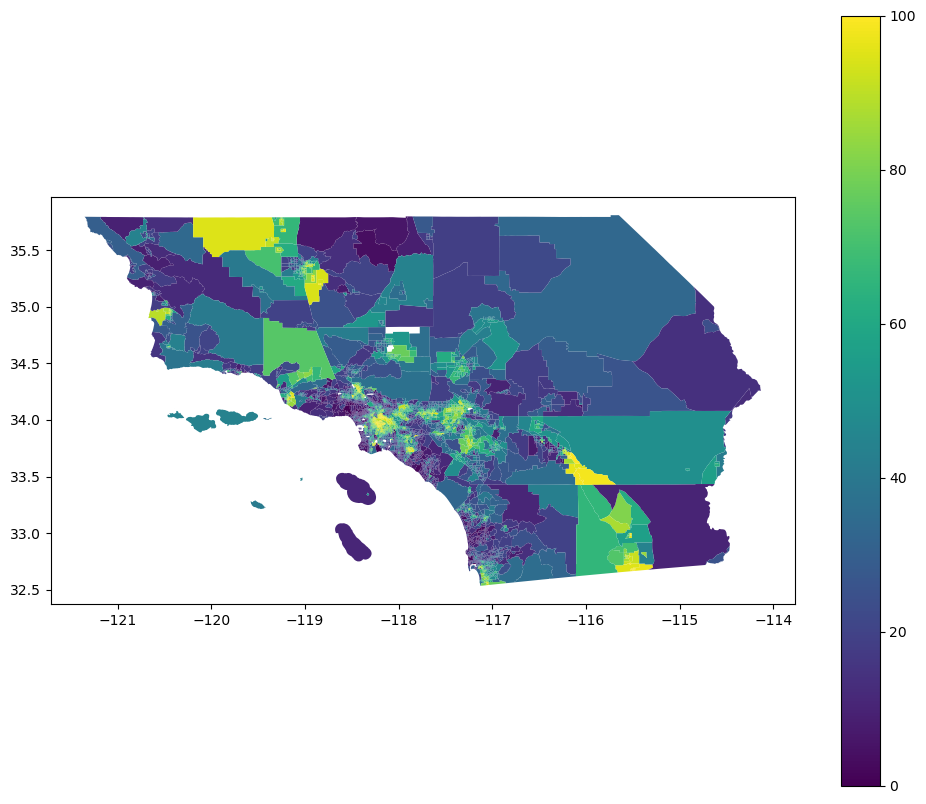

In [17]:
#Map of Percent Hispanic or Latino Pop
census_tracts_race.plot(figsize=(12,10),
                 column='percent Hispanic or Latino',
                 legend=True)

<AxesSubplot: >

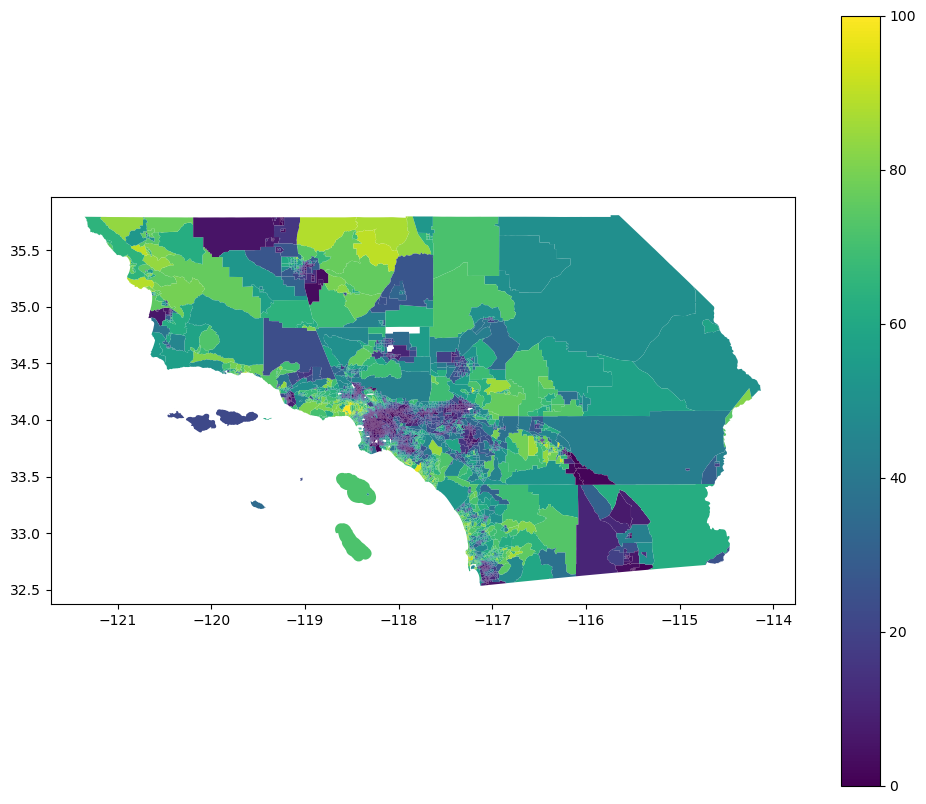

In [18]:
#Map of Percent non-Hispanic White Pop
census_tracts_race.plot(figsize=(12,10),
                 column='percent Not Hispanic and White Alone',
                 legend=True)

<AxesSubplot: >

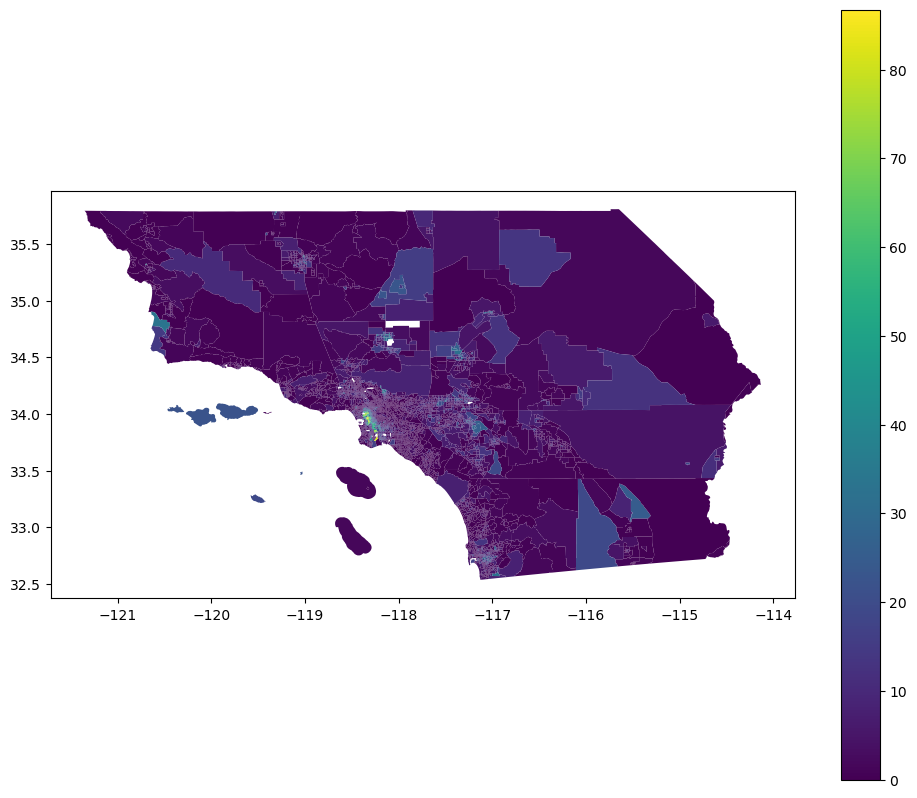

In [19]:
#Map of Percent non-Hispanic Black Pop
census_tracts_race.plot(figsize=(12,10),
                 column='percent Not Hispanic and Black or African American Alone',
                 legend=True)

<AxesSubplot: >

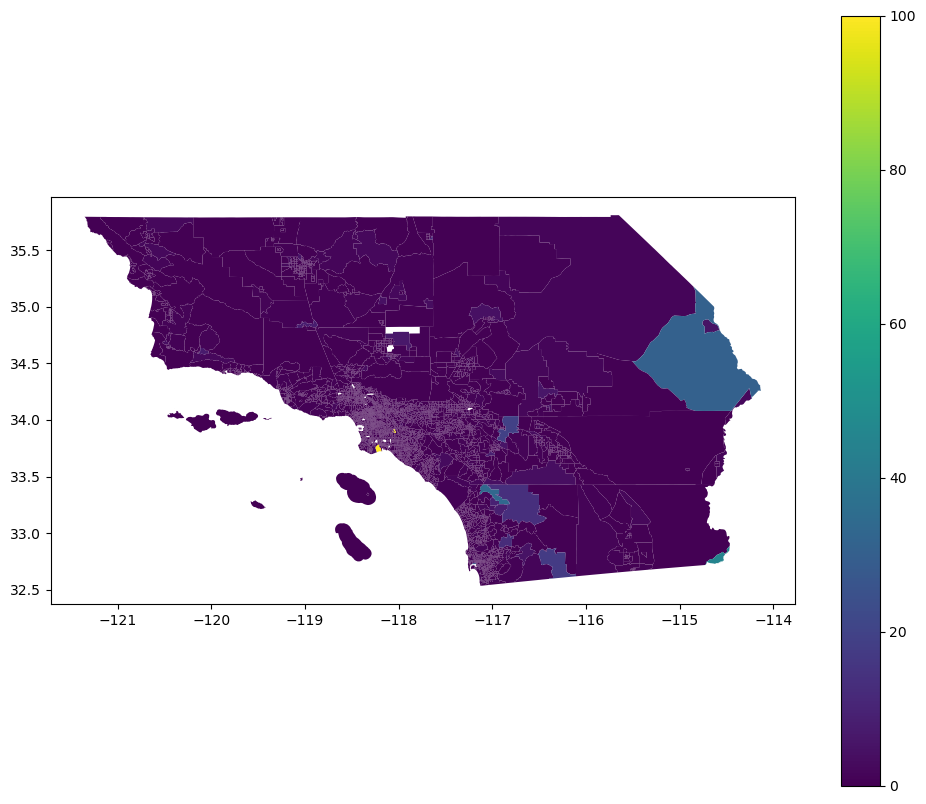

In [20]:
#Map of Percent non-Hispanic American indian and Alaska Native Pop
census_tracts_race.plot(figsize=(12,10),
                 column='percent Not Hispanic and American Indian and Alaska Native Alone',
                 legend=True)

<AxesSubplot: >

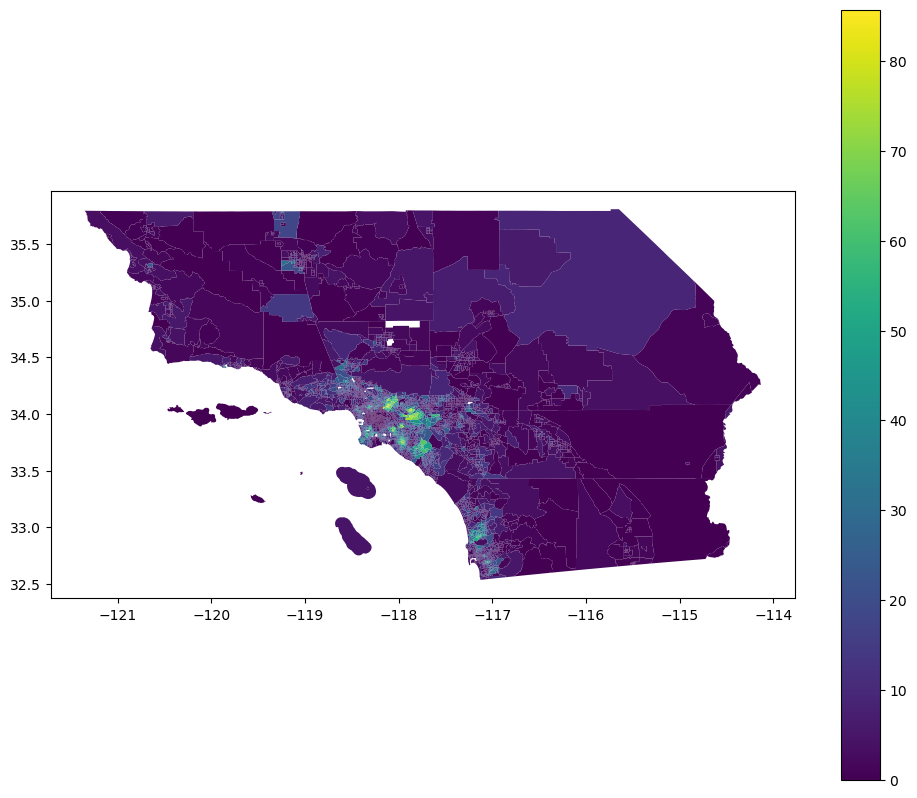

In [21]:
#Map of Percent non-Hispanic Asian Pop
census_tracts_race.plot(figsize=(12,10),
                 column='percent Not Hispanic and Asian Alone',
                 legend=True)

# **Age** 

In [2]:
#Setting up geopandas and uploading csv file
import pandas as pd

In [3]:
df = pd.read_csv('data_2019/age_2019.csv')

In [53]:
#Looking at size of data
df.shape

(2498, 79)

In [54]:
df.head()

Geo_FIPS                                          Geo_QName Geo_FILEID  \
0  6037101110  Census Tract 1011.10, Los Angeles County, Cali...      ACSSF   
1  6037101122  Census Tract 1011.22, Los Angeles County, Cali...      ACSSF   
2  6037101220  Census Tract 1012.20, Los Angeles County, Cali...      ACSSF   
3  6037101221  Census Tract 1012.21, Los Angeles County, Cali...      ACSSF   
4  6037101222  Census Tract 1012.22, Los Angeles County, Cali...      ACSSF   

  Geo_STUSAB  Geo_SUMLEV  Geo_GEOCOMP  Geo_LOGRECNO  Geo_US  Geo_REGION  \
0         ca         140            0          4200     NaN         NaN   
1         ca         140            0          4201     NaN         NaN   
2         ca         140            0          4202     NaN         NaN   
3         ca         140            0          4203     NaN         NaN   
4         ca         140            0          4204     NaN         NaN   

   Geo_DIVISION  ...  SE_C01001_015  SE_C01001_016  SE_C01001_017  \
0           NaN  ...            158            293             97   
1           NaN  ...            465            347            202   
2           NaN  ...            353            306            134   
3           NaN  ...            245            272            173   
4           NaN  ...            218            133             69   

   SE_C01001_018  SE_C01001_019  SE_C01001_020  SE_C01001_021  SE_C01001_022  \
0            107            225            305            100            111   
1            164            134            121            230            147   
2            135             60            110            150            107   
3            111             51             86            161              0   
4            105            122             71             37             59   

   SE_C01001_023  SE_C01001_024  
0             94             38  
1            131            160  
2             40             32  
3            106            179  
4             56             41  

[5 rows x 79 columns]

In [55]:
#Looking at data types
df.info (verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Geo_FIPS       2498 non-null   int64  
 1   Geo_QName      2498 non-null   object 
 2   Geo_FILEID     2498 non-null   object 
 3   Geo_STUSAB     2498 non-null   object 
 4   Geo_SUMLEV     2498 non-null   int64  
 5   Geo_GEOCOMP    2498 non-null   int64  
 6   Geo_LOGRECNO   2498 non-null   int64  
 7   Geo_US         0 non-null      float64
 8   Geo_REGION     0 non-null      float64
 9   Geo_DIVISION   0 non-null      float64
 10  Geo_STATECE    0 non-null      float64
 11  Geo_STATE      2498 non-null   int64  
 12  Geo_COUNTY     2498 non-null   int64  
 13  Geo_COUSUB     0 non-null      float64
 14  Geo_PLACE      0 non-null      float64
 15  Geo_TRACT      2498 non-null   int64  
 16  Geo_BLKGRP     0 non-null      float64
 17  Geo_CONCIT     0 non-null      float64
 18  Geo_AIAN

In [4]:
#fixing leading zero problem
df = pd.read_csv(
    'data_2019/age_2019.csv',
    dtype=
    {
        'Geo_FIPS':str,
        'Geo_STATE':str, 
        'Geo_COUNTY': str
    }
)

In [57]:
df.head()

Geo_FIPS                                          Geo_QName Geo_FILEID  \
0  06037101110  Census Tract 1011.10, Los Angeles County, Cali...      ACSSF   
1  06037101122  Census Tract 1011.22, Los Angeles County, Cali...      ACSSF   
2  06037101220  Census Tract 1012.20, Los Angeles County, Cali...      ACSSF   
3  06037101221  Census Tract 1012.21, Los Angeles County, Cali...      ACSSF   
4  06037101222  Census Tract 1012.22, Los Angeles County, Cali...      ACSSF   

  Geo_STUSAB  Geo_SUMLEV  Geo_GEOCOMP  Geo_LOGRECNO  Geo_US  Geo_REGION  \
0         ca         140            0          4200     NaN         NaN   
1         ca         140            0          4201     NaN         NaN   
2         ca         140            0          4202     NaN         NaN   
3         ca         140            0          4203     NaN         NaN   
4         ca         140            0          4204     NaN         NaN   

   Geo_DIVISION  ...  SE_C01001_015 SE_C01001_016 SE_C01001_017  \
0           NaN  ...            158           293            97   
1           NaN  ...            465           347           202   
2           NaN  ...            353           306           134   
3           NaN  ...            245           272           173   
4           NaN  ...            218           133            69   

   SE_C01001_018  SE_C01001_019  SE_C01001_020  SE_C01001_021  SE_C01001_022  \
0            107            225            305            100            111   
1            164            134            121            230            147   
2            135             60            110            150            107   
3            111             51             86            161              0   
4            105            122             71             37             59   

   SE_C01001_023  SE_C01001_024  
0             94             38  
1            131            160  
2             40             32  
3            106            179  
4             56             41  

[5 rows x 79 columns]

In [58]:
df.Geo_COUNTY.head()

0    037
1    037
2    037
3    037
4    037
Name: Geo_COUNTY, dtype: object

In [59]:
#getting rid of null columns
df.columns[df.isna().all()].tolist()

['Geo_US',
 'Geo_REGION',
 'Geo_DIVISION',
 'Geo_STATECE',
 'Geo_COUSUB',
 'Geo_PLACE',
 'Geo_BLKGRP',
 'Geo_CONCIT',
 'Geo_AIANHH',
 'Geo_AIANHHFP',
 'Geo_AIHHTLI',
 'Geo_AITSCE',
 'Geo_AITS',
 'Geo_ANRC',
 'Geo_CBSA',
 'Geo_CSA',
 'Geo_METDIV',
 'Geo_MACC',
 'Geo_MEMI',
 'Geo_NECTA',
 'Geo_CNECTA',
 'Geo_NECTADIV',
 'Geo_UA',
 'Geo_UACP',
 'Geo_CDCURR',
 'Geo_SLDU',
 'Geo_SLDL',
 'Geo_VTD',
 'Geo_ZCTA3',
 'Geo_ZCTA5',
 'Geo_SUBMCD',
 'Geo_SDELM',
 'Geo_SDSEC',
 'Geo_SDUNI',
 'Geo_UR',
 'Geo_PCI',
 'Geo_TAZ',
 'Geo_UGA',
 'Geo_PUMA5',
 'Geo_PUMA1',
 'Geo_BTTR',
 'Geo_BTBG',
 'Geo_PLACESE']

In [60]:
df = df.dropna(axis=1,how="all")

In [61]:
#Re-examining data after eliminating columns; there are now 36 rows not 79
df.info

<bound method DataFrame.info of          Geo_FIPS                                          Geo_QName  \
0     06037101110  Census Tract 1011.10, Los Angeles County, Cali...   
1     06037101122  Census Tract 1011.22, Los Angeles County, Cali...   
2     06037101220  Census Tract 1012.20, Los Angeles County, Cali...   
3     06037101221  Census Tract 1012.21, Los Angeles County, Cali...   
4     06037101222  Census Tract 1012.22, Los Angeles County, Cali...   
...           ...                                                ...   
2493  06037980038  Census Tract 9800.38, Los Angeles County, Cali...   
2494  06037980039  Census Tract 9800.39, Los Angeles County, Cali...   
2495  06037990100  Census Tract 9901, Los Angeles County, California   
2496  06037990200  Census Tract 9902, Los Angeles County, California   
2497  06037990300  Census Tract 9903, Los Angeles County, California   

     Geo_FILEID Geo_STUSAB  Geo_SUMLEV  Geo_GEOCOMP  Geo_LOGRECNO Geo_STATE  \
0         ACSSF         

In [62]:
df.head()

Geo_FIPS                                          Geo_QName Geo_FILEID  \
0  06037101110  Census Tract 1011.10, Los Angeles County, Cali...      ACSSF   
1  06037101122  Census Tract 1011.22, Los Angeles County, Cali...      ACSSF   
2  06037101220  Census Tract 1012.20, Los Angeles County, Cali...      ACSSF   
3  06037101221  Census Tract 1012.21, Los Angeles County, Cali...      ACSSF   
4  06037101222  Census Tract 1012.22, Los Angeles County, Cali...      ACSSF   

  Geo_STUSAB  Geo_SUMLEV  Geo_GEOCOMP  Geo_LOGRECNO Geo_STATE Geo_COUNTY  \
0         ca         140            0          4200        06        037   
1         ca         140            0          4201        06        037   
2         ca         140            0          4202        06        037   
3         ca         140            0          4203        06        037   
4         ca         140            0          4204        06        037   

   Geo_TRACT  ... SE_C01001_015 SE_C01001_016  SE_C01001_017  SE_C01001_018  \
0     101110  ...           158           293             97            107   
1     101122  ...           465           347            202            164   
2     101220  ...           353           306            134            135   
3     101221  ...           245           272            173            111   
4     101222  ...           218           133             69            105   

   SE_C01001_019  SE_C01001_020  SE_C01001_021  SE_C01001_022  SE_C01001_023  \
0            225            305            100            111             94   
1            134            121            230            147            131   
2             60            110            150            107             40   
3             51             86            161              0            106   
4            122             71             37             59             56   

   SE_C01001_024  
0             38  
1            160  
2             32  
3            179  
4             41  

[5 rows x 36 columns]

In [63]:
#removing unnecessary columns aside and defining columns to keep
columns_to_keep = ['Geo_FIPS',
                   'SE_C01001_001',
                   'SE_C01001_002',
                   'SE_C01001_003',
                   'SE_C01001_004',
                   'SE_C01001_005',
                   'SE_C01001_006',
                   'SE_C01001_007',
                   'SE_C01001_008',
                   'SE_C01001_009',
                   'SE_C01001_010',
                   'SE_C01001_011',
                   'SE_C01001_012',
                   'SE_C01001_013',
                   'SE_C01001_014',
                   'SE_C01001_015',
                   'SE_C01001_016',
                   'SE_C01001_017',
                   'SE_C01001_018',
                   'SE_C01001_019',
                   'SE_C01001_020',
                   'SE_C01001_021',
                   'SE_C01001_022',
                   'SE_C01001_023',
                   'SE_C01001_024']
df2 = df[columns_to_keep]

In [64]:
columns = list(df2)
columns

['Geo_FIPS',
 'SE_C01001_001',
 'SE_C01001_002',
 'SE_C01001_003',
 'SE_C01001_004',
 'SE_C01001_005',
 'SE_C01001_006',
 'SE_C01001_007',
 'SE_C01001_008',
 'SE_C01001_009',
 'SE_C01001_010',
 'SE_C01001_011',
 'SE_C01001_012',
 'SE_C01001_013',
 'SE_C01001_014',
 'SE_C01001_015',
 'SE_C01001_016',
 'SE_C01001_017',
 'SE_C01001_018',
 'SE_C01001_019',
 'SE_C01001_020',
 'SE_C01001_021',
 'SE_C01001_022',
 'SE_C01001_023',
 'SE_C01001_024']

In [65]:
#changing column name
df2.columns = ['Geo_FIPS',
'Total',
'Under 5 Years',
'5 to 9 Years',
'10 to 14 Years',
'15 to 17 Years',
'18 and 19 Years',
'20 Years',
'21 Years',
'22 to 24 Years',
'25 to 29 Years',
'30 to 34 Years',
'35 to 39 Years',
'40 to 44 Years',
'45 to 49 Years',
'50 to 54 Years',
'55 to 59 Years',
'60 and 61 Years',
'62 to 64 Years',
'65 and 66 Years',
'67 to 69 Years',
'70 to 74 Years',
'75 to 79 Years',
'80 to 84 Years',
'85 Years and Over']

In [66]:
#getting measures of central tendency/stats from total population
df2['Total'].head()

0    3879
1    4247
2    3583
3    3723
4    2690
Name: Total, dtype: int64

In [67]:
df2['Total'].mean()

4011.062850280224

In [68]:
df2['Total'].median

<bound method NDFrame._add_numeric_operations.<locals>.median of 0       3879
1       4247
2       3583
3       3723
4       2690
        ... 
2493       0
2494       0
2495       0
2496       0
2497       0
Name: Total, Length: 2498, dtype: int64>

In [69]:
df2['Total'].describe()

count     2498.00000
mean      4011.06285
std       1470.99188
min          0.00000
25%       2993.25000
50%       3933.00000
75%       4954.00000
max      13830.00000
Name: Total, dtype: float64

<AxesSubplot: ylabel='Frequency'>

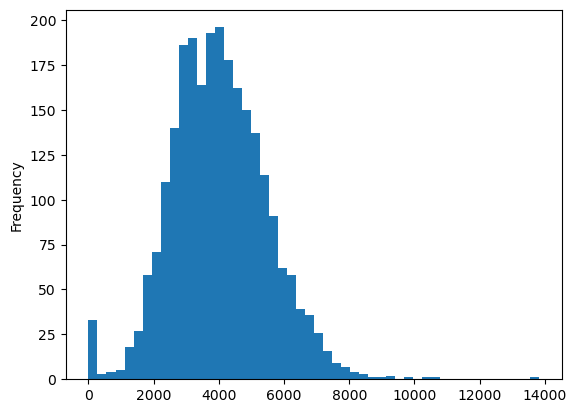

In [70]:
# plotting charts of age variable data
df2['Total'].plot.hist(bins=50)

<AxesSubplot: >

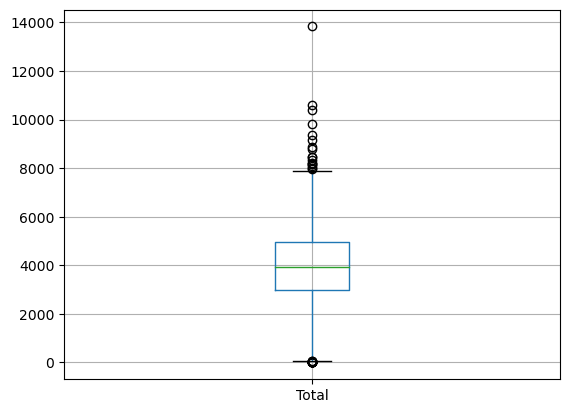

In [71]:
df2.boxplot(column=['Total'])

<AxesSubplot: xlabel='22 to 24 Years', ylabel='80 to 84 Years'>

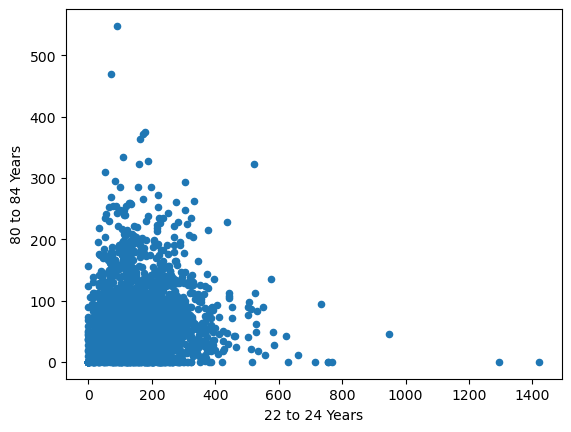

In [72]:
df2.plot.scatter(x='22 to 24 Years', y='80 to 84 Years')

In [73]:
#sorting age variables and then displaying data
df_sorted = df2.sort_values(by='Total', ascending = False)

In [74]:
df_sorted[['Geo_FIPS','Total']].head(12)

Geo_FIPS  Total
938   06037265301  13830
580   06037206020  10614
2438  06037920121  10391
1028  06037275604   9814
2278  06037702900   9355
2406  06037920028   9158
1604  06037502303   8883
69    06037108202   8776
2417  06037920043   8468
1207  06037401707   8464
1740  06037535101   8319
1309  06037406103   8191

In [75]:
#plotting the above table, top 12 most populated

<AxesSubplot: xlabel='Geo_FIPS'>

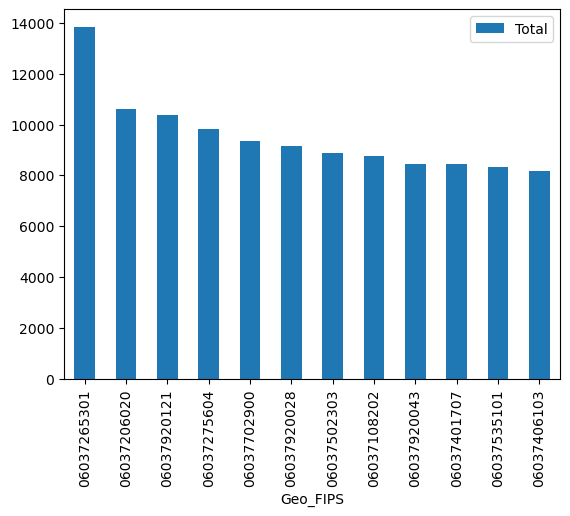

In [76]:
df_sorted.head(12).plot.bar(x='Geo_FIPS', y='Total')

<AxesSubplot: title={'center': 'Top 12 Census Tracts wih Highest Population in Los Angeles County in 2020'}, ylabel='Geo_FIPS'>

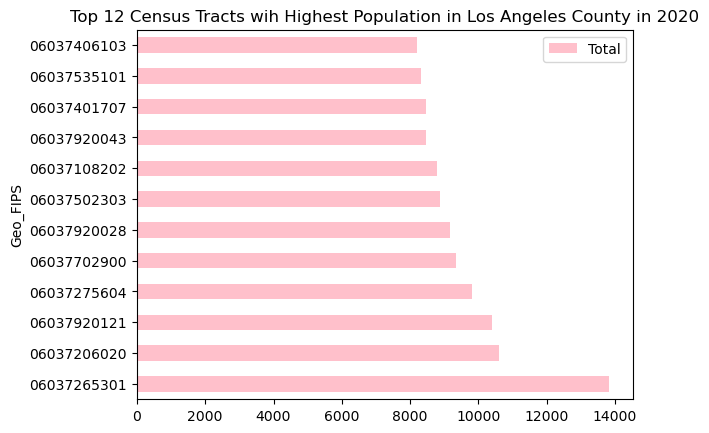

In [77]:
#adding a title
df_sorted.head(12).plot.barh(x='Geo_FIPS', y='Total', title='Top 12 Census Tracts wih Highest Population in Los Angeles County in 2020', color ='pink')

In [78]:
#filtering data for census tracts that don't have a population
df2[df2['Total']==0]

Geo_FIPS  Total  Under 5 Years  5 to 9 Years  10 to 14 Years  \
2459  06037980001      0              0             0               0   
2460  06037980002      0              0             0               0   
2461  06037980003      0              0             0               0   
2462  06037980004      0              0             0               0   
2463  06037980005      0              0             0               0   
2464  06037980006      0              0             0               0   
2465  06037980007      0              0             0               0   
2471  06037980013      0              0             0               0   
2476  06037980018      0              0             0               0   
2478  06037980020      0              0             0               0   
2480  06037980022      0              0             0               0   
2481  06037980023      0              0             0               0   
2485  06037980028      0              0             0               0   
2486  06037980030      0              0             0               0   
2492  06037980037      0              0             0               0   
2493  06037980038      0              0             0               0   
2494  06037980039      0              0             0               0   
2495  06037990100      0              0             0               0   
2496  06037990200      0              0             0               0   
2497  06037990300      0              0             0               0   

      15 to 17 Years  18 and 19 Years  20 Years  21 Years  22 to 24 Years  \
2459               0                0         0         0               0   
2460               0                0         0         0               0   
2461               0                0         0         0               0   
2462               0                0         0         0               0   
2463               0                0         0         0               0   
2464               0                0         0         0               0   
2465               0                0         0         0               0   
2471               0                0         0         0               0   
2476               0                0         0         0               0   
2478               0                0         0         0               0   
2480               0                0         0         0               0   
2481               0                0         0         0               0   
2485               0                0         0         0               0   
2486               0                0         0         0               0   
2492               0                0         0         0               0   
2493               0                0         0         0               0   
2494               0                0         0         0               0   
2495               0                0         0         0               0   
2496               0                0         0         0               0   
2497               0                0         0         0               0   

      ...  50 to 54 Years  55 to 59 Years  60 and 61 Years  62 to 64 Years  \
2459  ...               0               0                0               0   
2460  ...               0               0                0               0   
2461  ...               0               0                0               0   
2462  ...               0               0                0               0   
2463  ...               0               0                0               0   
2464  ...               0               0                0               0   
2465  ...               0               0                0               0   
2471  ...               0               0                0               0   
2476  ...               0               0                0               0   
2478  ...               0               0                0               0   

In [79]:
import geopandas as gpd

In [80]:
tracts = gpd.read_file('Data/Census_Tracts_2020.geojson')
tracts.head()

OBJECTID    CT20    LABEL   ShapeSTArea  ShapeSTLength  \
0         1  101110  1011.10  1.229562e+07   15083.854287   
1         2  101122  1011.22  2.845774e+07   31671.455844   
2         3  101220  1012.20  7.522093e+06   12698.783810   
3         4  101221  1012.21  3.812000e+06    9161.710543   
4         5  101222  1012.22  3.191371e+06    9980.600461   

                                            geometry  
0  POLYGON ((-118.28491 34.25948, -118.28492 34.2...  
1  POLYGON ((-118.29015 34.27417, -118.29015 34.2...  
2  POLYGON ((-118.28100 34.25592, -118.28198 34.2...  
3  POLYGON ((-118.28735 34.25591, -118.28863 34.2...  
4  POLYGON ((-118.28594 34.25405, -118.28594 34.2...

<AxesSubplot: >

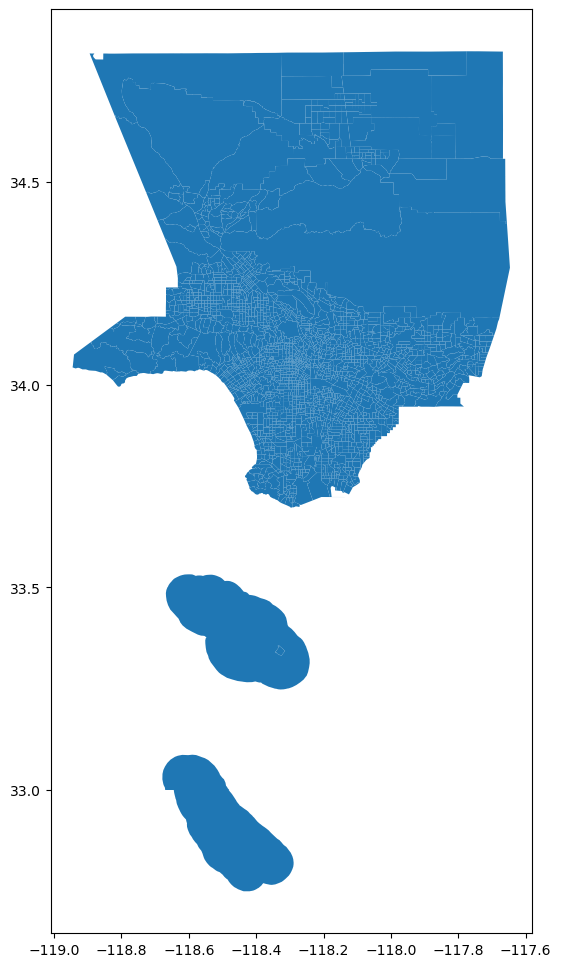

In [81]:
#plotting the geographic data for census tracts
tracts.plot(figsize=(12,12))

In [82]:
#getting more info on the dataset
tracts.info(verbose=True,show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2495 entries, 0 to 2494
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   OBJECTID       2495 non-null   int64   
 1   CT20           2495 non-null   object  
 2   LABEL          2495 non-null   object  
 3   ShapeSTArea    2495 non-null   float64 
 4   ShapeSTLength  2495 non-null   float64 
 5   geometry       2495 non-null   geometry
dtypes: float64(2), geometry(1), int64(1), object(2)
memory usage: 117.1+ KB


In [83]:
#subsetting data
tracts = tracts[['CT20', 'geometry']]
tracts.head()

CT20                                           geometry
0  101110  POLYGON ((-118.28491 34.25948, -118.28492 34.2...
1  101122  POLYGON ((-118.29015 34.27417, -118.29015 34.2...
2  101220  POLYGON ((-118.28100 34.25592, -118.28198 34.2...
3  101221  POLYGON ((-118.28735 34.25591, -118.28863 34.2...
4  101222  POLYGON ((-118.28594 34.25405, -118.28594 34.2...

In [84]:
#making a column for Geo FIPS
tracts['Geo_FIPS'] = '06'+'037'+tracts['CT20']

/opt/conda/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [85]:
tracts.head()

CT20                                           geometry     Geo_FIPS
0  101110  POLYGON ((-118.28491 34.25948, -118.28492 34.2...  06037101110
1  101122  POLYGON ((-118.29015 34.27417, -118.29015 34.2...  06037101122
2  101220  POLYGON ((-118.28100 34.25592, -118.28198 34.2...  06037101220
3  101221  POLYGON ((-118.28735 34.25591, -118.28863 34.2...  06037101221
4  101222  POLYGON ((-118.28594 34.25405, -118.28594 34.2...  06037101222

In [86]:
#joining data and making new data frame
tracts_age=tracts.merge(df2,on="Geo_FIPS")

In [87]:
tracts_age.head()

CT20                                           geometry     Geo_FIPS  \
0  101110  POLYGON ((-118.28491 34.25948, -118.28492 34.2...  06037101110   
1  101122  POLYGON ((-118.29015 34.27417, -118.29015 34.2...  06037101122   
2  101220  POLYGON ((-118.28100 34.25592, -118.28198 34.2...  06037101220   
3  101221  POLYGON ((-118.28735 34.25591, -118.28863 34.2...  06037101221   
4  101222  POLYGON ((-118.28594 34.25405, -118.28594 34.2...  06037101222   

   Total  Under 5 Years  5 to 9 Years  10 to 14 Years  15 to 17 Years  \
0   3879            131            96             178             172   
1   4247            131           217             247              91   
2   3583            132           196             245              72   
3   3723            134           146             207             158   
4   2690             56           276             166              19   

   18 and 19 Years  20 Years  ...  50 to 54 Years  55 to 59 Years  \
0              103         0  ...             158             293   
1               64        23  ...             465             347   
2               96        62  ...             353             306   
3              185        18  ...             245             272   
4               33        41  ...             218             133   

   60 and 61 Years  62 to 64 Years  65 and 66 Years  67 to 69 Years  \
0               97             107              225             305   
1              202             164              134             121   
2              134             135               60             110   
3              173             111               51              86   
4               69             105              122              71   

   70 to 74 Years  75 to 79 Years  80 to 84 Years  85 Years and Over  
0             100             111              94                 38  
1             230             147             131                160  
2             150             107              40                 32  
3             161               0             106                179  
4              37              59              56                 41  

[5 rows x 27 columns]

<AxesSubplot: >

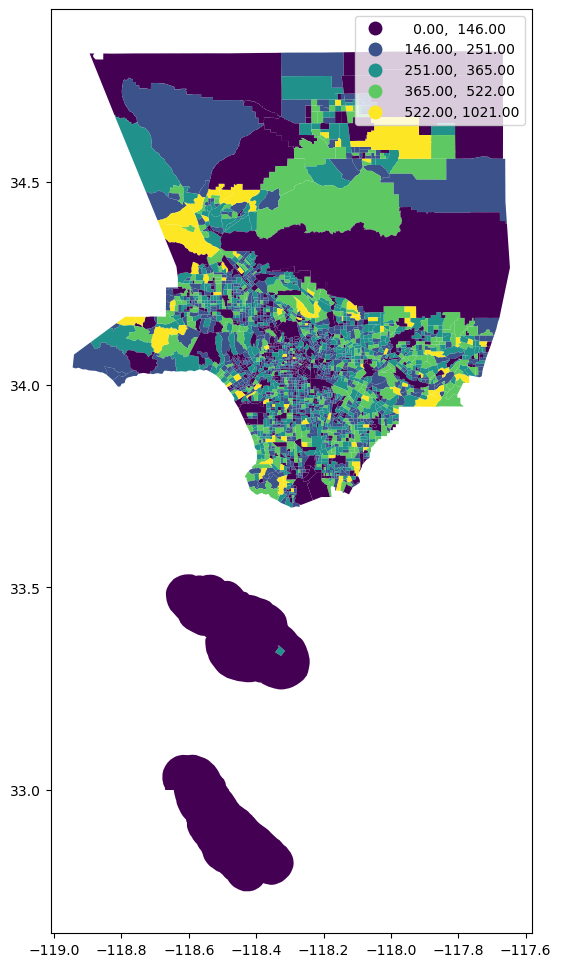

In [88]:
#mapping ages 55 to 59 yrs
tracts_age.plot(figsize=(12,12), 
                column='55 to 59 Years',
                legend=True,
                scheme='NaturalBreaks')

<AxesSubplot: >

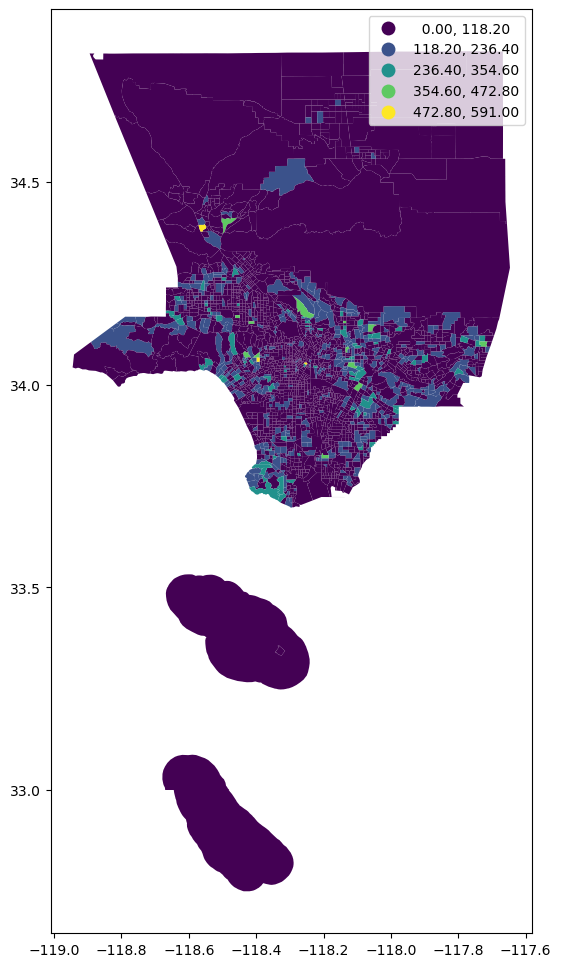

In [89]:
#mapping ages 85 Years and Over
tracts_age.plot(figsize=(12,12), 
                column='85 Years and Over',
                legend=True,
                scheme='equal_interval')

<AxesSubplot: >

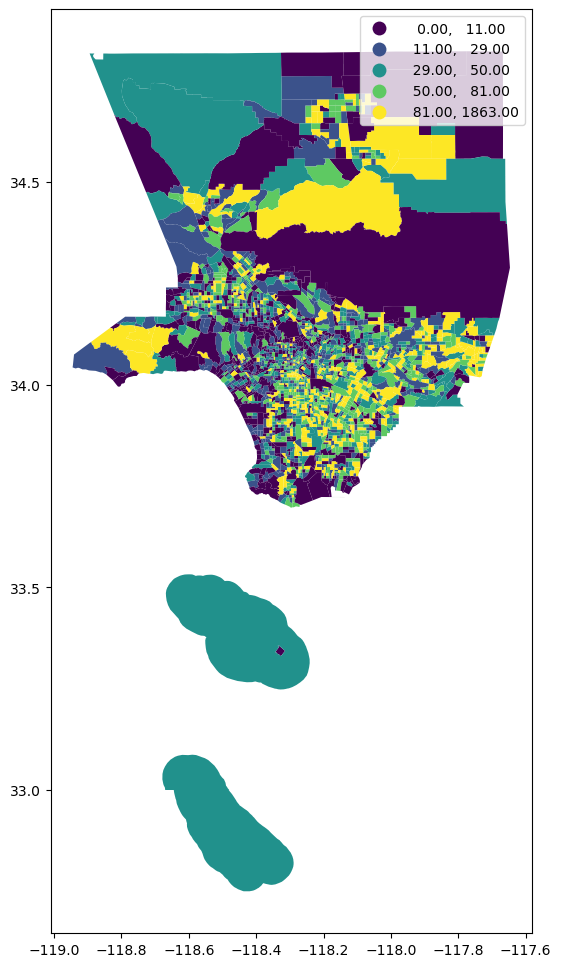

In [90]:
#mapping age 20
tracts_age.plot(figsize=(12,12), 
                column='20 Years',
                legend=True,
                scheme='quantiles')

In [12]:
## Poverty Status

## Importing data
Import `pandas` and `geopandas` to the notebook for further analysis

In [1]:
import geopandas as gpd
import pandas as pd

Name the dataframe as "df" and and apply `pd.read_csv` to read the file. Apply `.head()` to see the data at the first five rows

In [2]:
df = pd.read_csv("Data/R13284583_SL140.csv")
df.head()

Geo_FIPS                                          Geo_QName Geo_FILEID  \
0  6037101110  Census Tract 1011.10, Los Angeles County, Cali...      ACSSF   
1  6037101122  Census Tract 1011.22, Los Angeles County, Cali...      ACSSF   
2  6037101220  Census Tract 1012.20, Los Angeles County, Cali...      ACSSF   
3  6037101221  Census Tract 1012.21, Los Angeles County, Cali...      ACSSF   
4  6037101222  Census Tract 1012.22, Los Angeles County, Cali...      ACSSF   

  Geo_STUSAB  Geo_SUMLEV  Geo_GEOCOMP  Geo_LOGRECNO  Geo_US  Geo_REGION  \
0         ca         140            0          4200     NaN         NaN   
1         ca         140            0          4201     NaN         NaN   
2         ca         140            0          4202     NaN         NaN   
3         ca         140            0          4203     NaN         NaN   
4         ca         140            0          4204     NaN         NaN   

   Geo_DIVISION  ...  ACS21_5yr_B25106043s  ACS21_5yr_B25106044s  \
0           NaN  ...             45.454540             18.787880   
1           NaN  ...              7.272727             74.545460   
2           NaN  ...             26.060610              7.878788   
3           NaN  ...             66.666660             35.757580   
4           NaN  ...              9.696970              7.878788   

   ACS21_5yr_B25106045s  ACS21_5yr_B25106046s  ACS21_5yr_B992523001  \
0              7.878788              23.63636                   850   
1              7.878788              55.15152                  1028   
2             20.000000              13.93939                   595   
3              7.878788              35.75758                   310   
4             20.606060              16.36364                   119   

   ACS21_5yr_B992523002  ACS21_5yr_B992523003  ACS21_5yr_B992523001s  \
0                   279                   571                    NaN   
1                   288                   740                    NaN   
2                   157                   438                    NaN   
3                    45                   265                    NaN   
4                   112                     7                    NaN   

   ACS21_5yr_B992523002s  ACS21_5yr_B992523003s  
0                    NaN                    NaN  
1                    NaN                    NaN  
2                    NaN                    NaN  
3                    NaN                    NaN  
4                    NaN                    NaN  

[5 rows x 197 columns]

## Overwriting default display settings 
There are too many columns which are not shown in the dataframe. Thus, I apply pd.set_option to display all the columns and rows

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head(3)

Geo_FIPS                                          Geo_QName Geo_FILEID  \
0  6037101110  Census Tract 1011.10, Los Angeles County, Cali...      ACSSF   
1  6037101122  Census Tract 1011.22, Los Angeles County, Cali...      ACSSF   
2  6037101220  Census Tract 1012.20, Los Angeles County, Cali...      ACSSF   

  Geo_STUSAB  Geo_SUMLEV  Geo_GEOCOMP  Geo_LOGRECNO  Geo_US  Geo_REGION  \
0         ca         140            0          4200     NaN         NaN   
1         ca         140            0          4201     NaN         NaN   
2         ca         140            0          4202     NaN         NaN   

   Geo_DIVISION  Geo_STATECE  Geo_STATE  Geo_COUNTY  Geo_COUSUB  Geo_PLACE  \
0           NaN          NaN          6          37         NaN        NaN   
1           NaN          NaN          6          37         NaN        NaN   
2           NaN          NaN          6          37         NaN        NaN   

   Geo_TRACT  Geo_BLKGRP  Geo_CONCIT  Geo_AIANHH  Geo_AIANHHFP  Geo_AIHHTLI  \
0     101110         NaN         NaN         NaN           NaN          NaN   
1     101122         NaN         NaN         NaN           NaN          NaN   
2     101220         NaN         NaN         NaN           NaN          NaN   

   Geo_AITSCE  Geo_AITS  Geo_ANRC  Geo_CBSA  Geo_CSA  Geo_METDIV  Geo_MACC  \
0         NaN       NaN       NaN       NaN      NaN         NaN       NaN   
1         NaN       NaN       NaN       NaN      NaN         NaN       NaN   
2         NaN       NaN       NaN       NaN      NaN         NaN       NaN   

   Geo_MEMI  Geo_NECTA  Geo_CNECTA  Geo_NECTADIV  Geo_UA  Geo_UACP  \
0       NaN        NaN         NaN           NaN     NaN       NaN   
1       NaN        NaN         NaN           NaN     NaN       NaN   
2       NaN        NaN         NaN           NaN     NaN       NaN   

   Geo_CDCURR  Geo_SLDU  Geo_SLDL  Geo_VTD  Geo_ZCTA3  Geo_ZCTA5  Geo_SUBMCD  \
0         NaN       NaN       NaN      NaN        NaN        NaN         NaN   
1         NaN       NaN       NaN      NaN        NaN        NaN         NaN   
2         NaN       NaN       NaN      NaN        NaN        NaN         NaN   

   Geo_SDELM  Geo_SDSEC  Geo_SDUNI  Geo_UR  Geo_PCI  Geo_TAZ  Geo_UGA  \
0        NaN        NaN        NaN     NaN      NaN      NaN      NaN   
1        NaN        NaN        NaN     NaN      NaN      NaN      NaN   
2        NaN        NaN        NaN     NaN      NaN      NaN      NaN   

   Geo_PUMA5  Geo_PUMA1           Geo_GEOID              Geo_NAME  Geo_BTTR  \
0        NaN        NaN  14000US06037101110  Census Tract 1011.10       NaN   
1        NaN        NaN  14000US06037101122  Census Tract 1011.22       NaN   
2        NaN        NaN  14000US06037101220  Census Tract 1012.20       NaN   

   Geo_BTBG  Geo_PLACESE  SE_A14003B_001  SE_A14003B_002  SE_A14003B_003  \
0       NaN          NaN             644              26              10   
1       NaN          NaN             344              53               0   
2       NaN          NaN             762              69               0   

   SE_A14003B_004  SE_A14003B_005  SE_A14003B_006  SE_A14003B_007  \
0             106              38              33              20   
1               0               0               0              30   
2              82              28              96              66   

   SE_A14003B_008  SE_A14003B_009  SE_A14003B_010  SE_A14003B_011  \
0              88              55              52             177   
1               9             128              15              77   
2              75             199              91              46   

   SE_A14003B_012  SE_A14016_001  SE_A10026_001  SE_A10026_002  SE_A10026_003  \
0              39        50417.0           1494            208              0   
1              32        64651.0           1372             95              0   
2              10        44200.0           1357            144              0   

   SE_A10026_004  SE_A10026_005  SE_A10026_006  

## Preliminary inspection


Apply `.shape`to understand the number of rows and columns in the df

In [4]:
df.shape

(2498, 197)

Apply `.info` to see the data type. Put `verbose=True, show_counts=True` within because the data has so many columns.

In [5]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 197 columns):
 #    Column                 Non-Null Count  Dtype  
---   ------                 --------------  -----  
 0    Geo_FIPS               2498 non-null   int64  
 1    Geo_QName              2498 non-null   object 
 2    Geo_FILEID             2498 non-null   object 
 3    Geo_STUSAB             2498 non-null   object 
 4    Geo_SUMLEV             2498 non-null   int64  
 5    Geo_GEOCOMP            2498 non-null   int64  
 6    Geo_LOGRECNO           2498 non-null   int64  
 7    Geo_US                 0 non-null      float64
 8    Geo_REGION             0 non-null      float64
 9    Geo_DIVISION           0 non-null      float64
 10   Geo_STATECE            0 non-null      float64
 11   Geo_STATE              2498 non-null   int64  
 12   Geo_COUNTY             2498 non-null   int64  
 13   Geo_COUSUB             0 non-null      float64
 14   Geo_PLACE              0 non-null     

## Adjust data types
We can see that the FIPS codes in 'Geo_FIPS' column lack "0" in the beginning letter since the data type is interger rather than string. Thus, I convert them to string with `dtype={'column':str,}`.

In [6]:
df = pd.read_csv(
    'Data/R13284583_SL140.csv',
    dtype=
    {'Geo_FIPS':str,})


Let's check whether there is any difference among those columns with `head()`.

In [7]:
df.head()

Geo_FIPS                                          Geo_QName Geo_FILEID  \
0  06037101110  Census Tract 1011.10, Los Angeles County, Cali...      ACSSF   
1  06037101122  Census Tract 1011.22, Los Angeles County, Cali...      ACSSF   
2  06037101220  Census Tract 1012.20, Los Angeles County, Cali...      ACSSF   
3  06037101221  Census Tract 1012.21, Los Angeles County, Cali...      ACSSF   
4  06037101222  Census Tract 1012.22, Los Angeles County, Cali...      ACSSF   

  Geo_STUSAB  Geo_SUMLEV  Geo_GEOCOMP  Geo_LOGRECNO  Geo_US  Geo_REGION  \
0         ca         140            0          4200     NaN         NaN   
1         ca         140            0          4201     NaN         NaN   
2         ca         140            0          4202     NaN         NaN   
3         ca         140            0          4203     NaN         NaN   
4         ca         140            0          4204     NaN         NaN   

   Geo_DIVISION  Geo_STATECE  Geo_STATE  Geo_COUNTY  Geo_COUSUB  Geo_PLACE  \
0           NaN          NaN          6          37         NaN        NaN   
1           NaN          NaN          6          37         NaN        NaN   
2           NaN          NaN          6          37         NaN        NaN   
3           NaN          NaN          6          37         NaN        NaN   
4           NaN          NaN          6          37         NaN        NaN   

   Geo_TRACT  Geo_BLKGRP  Geo_CONCIT  Geo_AIANHH  Geo_AIANHHFP  Geo_AIHHTLI  \
0     101110         NaN         NaN         NaN           NaN          NaN   
1     101122         NaN         NaN         NaN           NaN          NaN   
2     101220         NaN         NaN         NaN           NaN          NaN   
3     101221         NaN         NaN         NaN           NaN          NaN   
4     101222         NaN         NaN         NaN           NaN          NaN   

   Geo_AITSCE  Geo_AITS  Geo_ANRC  Geo_CBSA  Geo_CSA  Geo_METDIV  Geo_MACC  \
0         NaN       NaN       NaN       NaN      NaN         NaN       NaN   
1         NaN       NaN       NaN       NaN      NaN         NaN       NaN   
2         NaN       NaN       NaN       NaN      NaN         NaN       NaN   
3         NaN       NaN       NaN       NaN      NaN         NaN       NaN   
4         NaN       NaN       NaN       NaN      NaN         NaN       NaN   

   Geo_MEMI  Geo_NECTA  Geo_CNECTA  Geo_NECTADIV  Geo_UA  Geo_UACP  \
0       NaN        NaN         NaN           NaN     NaN       NaN   
1       NaN        NaN         NaN           NaN     NaN       NaN   
2       NaN        NaN         NaN           NaN     NaN       NaN   
3       NaN        NaN         NaN           NaN     NaN       NaN   
4       NaN        NaN         NaN           NaN     NaN       NaN   

   Geo_CDCURR  Geo_SLDU  Geo_SLDL  Geo_VTD  Geo_ZCTA3  Geo_ZCTA5  Geo_SUBMCD  \
0         NaN       NaN       NaN      NaN        NaN        NaN         NaN   
1         NaN       NaN       NaN      NaN        NaN        NaN         NaN   
2         NaN       NaN       NaN      NaN        NaN        NaN         NaN   
3         NaN       NaN       NaN      NaN        NaN        NaN         NaN   
4         NaN       NaN       NaN      NaN        NaN        NaN         NaN   

   Geo_SDELM  Geo_SDSEC  Geo_SDUNI  Geo_UR  Geo_PCI  Geo_TAZ  Geo_UGA  \
0        NaN        NaN        NaN     NaN      NaN      NaN      NaN   
1        NaN        NaN        NaN     NaN      NaN      NaN      NaN   
2        NaN        NaN        NaN     NaN      NaN      NaN      NaN   
3        NaN        NaN        NaN     NaN      NaN      NaN      NaN   
4        NaN        NaN        NaN     NaN      NaN      NaN      NaN   

   Geo_PUMA5  Geo_PUMA1           Geo_GEOID              Geo_NAME  Geo_BTTR  \
0        NaN        NaN  14000US06037101110  Census Tract 1011.10       NaN   
1        NaN        NaN  14000US06037101122  Census Tract 1011.22       NaN   
2        NaN        NaN  14000US06037101220  Census Tract 1012.20       NaN   
3   

## Data Cleaning
There are many columns related to housing. Since I want to know the poverty status of people in housing units, I only need to select certain columns that can reflect poverty status to clean up the data.     


Let's see all the columns with `.columns`.

In [8]:
df.columns

Index(['Geo_FIPS', 'Geo_QName', 'Geo_FILEID', 'Geo_STUSAB', 'Geo_SUMLEV',
       'Geo_GEOCOMP', 'Geo_LOGRECNO', 'Geo_US', 'Geo_REGION', 'Geo_DIVISION',
       ...
       'ACS21_5yr_B25106043s', 'ACS21_5yr_B25106044s', 'ACS21_5yr_B25106045s',
       'ACS21_5yr_B25106046s', 'ACS21_5yr_B992523001', 'ACS21_5yr_B992523002',
       'ACS21_5yr_B992523003', 'ACS21_5yr_B992523001s',
       'ACS21_5yr_B992523002s', 'ACS21_5yr_B992523003s'],
      dtype='object', length=197)

The columns I need are 'Geo_FIPS','ACS21_5yr_B17101001', 'ACS21_5yr_B17101002','ACS21_5yr_B17101003'. Let's make a new data frame that keep those data.

In [9]:
# define columns to keep
columns_to_keep = ['Geo_FIPS',
                   'ACS21_5yr_B17101001',
                   'ACS21_5yr_B17101002',
                   'ACS21_5yr_B17101003',
                  ]

# make a new dataframe
df2 = df[columns_to_keep]

# Apply`.info()` to see the data types.
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Geo_FIPS             2498 non-null   object
 1   ACS21_5yr_B17101001  2498 non-null   int64 
 2   ACS21_5yr_B17101002  2498 non-null   int64 
 3   ACS21_5yr_B17101003  2498 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 78.2+ KB


In [10]:
df2.sample(2)

Geo_FIPS  ACS21_5yr_B17101001  ACS21_5yr_B17101002  \
2254  06037701304                 6556                  325   
2391  06037910804                 2878                  206   

      ACS21_5yr_B17101003  
2254                 6231  
2391                 2672

## Define and rename data
Rename the column to make it more readable. Let's see the columns first.

In [11]:
df2.columns

Index(['Geo_FIPS', 'ACS21_5yr_B17101001', 'ACS21_5yr_B17101002',
       'ACS21_5yr_B17101003'],
      dtype='object')

Replace the values with your desired column names.

In [12]:
df2.columns = ['FIPS',
'Total',
'Below Poverty Level',
'At Or Above Poverty Level']

Take a look at our new dataframe.

In [13]:
df2.sample(3)

FIPS  Total  Below Poverty Level  At Or Above Poverty Level
634   06037209510   2865                  870                       1995
1138  06037302201   3764                  904                       2860
192   06037123206   2289                  635                       1654

## Add columns
Let's add percentage of housing units below poverty level 

In [14]:
df2['Pct_Below Poverty Level'] = df2['Below Poverty Level']/df2['Total']*100

/tmp/ipykernel_1344/340260745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Pct_Below Poverty Level'] = df2['Below Poverty Level']/df2['Total']*100


In [15]:
df2.head(2)

FIPS  Total  Below Poverty Level  At Or Above Poverty Level  \
0  06037101110   3791                  421                       3370   
1  06037101122   4216                  260                       3956   

   Pct_Below Poverty Level  
0                11.105249  
1                 6.166983

## Simple plots
Let's make some plots! First, look at the statistical numbers.

In [16]:
df2.describe()

Total  Below Poverty Level  At Or Above Poverty Level  \
count   2498.000000          2498.000000                2498.000000   
mean    3926.533627           531.927142                3394.606485   
std     1459.693033           399.090977                1345.979682   
min        0.000000             0.000000                   0.000000   
25%     2931.000000           228.000000                2505.250000   
50%     3862.000000           441.000000                3278.500000   
75%     4874.000000           732.750000                4233.750000   
max    10308.000000          2817.000000                9635.000000   

       Pct_Below Poverty Level  
count              2471.000000  
mean                 13.933784  
std                  10.091862  
min                   0.000000  
25%                   6.563064  
50%                  11.344756  
75%                  19.050174  
max                 100.000000

<AxesSubplot: ylabel='Frequency'>

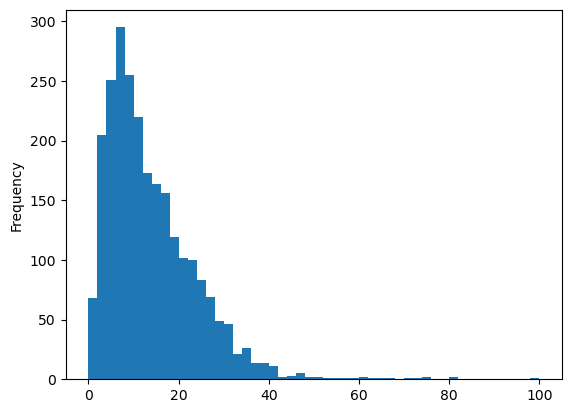

In [17]:
# plot 'pct_poverty' as a historgram with 50 bins.
df2['Pct_Below Poverty Level'].plot.hist(bins=50)

<AxesSubplot: >

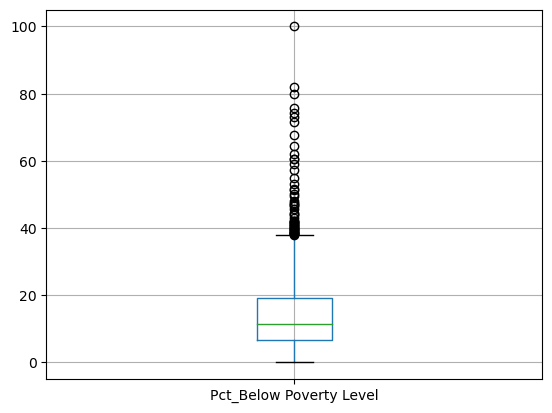

In [18]:
# plotbox
df2.boxplot(column=['Pct_Below Poverty Level'])

Let's see the top ten and bottom ten percentage and census tracts of poverty level by `.sort_values`.

In [19]:
# Top ten 
df_sorted_topten = df2.sort_values(by='Pct_Below Poverty Level',ascending = False)
df_sorted_topten[['FIPS','Pct_Below Poverty Level']].head(10)

FIPS  Pct_Below Poverty Level
2488  06037980033               100.000000
2472  06037980014                81.818182
2469  06037980011                80.000000
941   06037265306                75.816024
771   06037224702                74.271229
589   06037206302                72.985075
940   06037265304                71.643150
2475  06037980017                67.525773
590   06037206303                64.316547
588   06037206301                62.087422

In [20]:
# Bottom ten 
df_sorted_bottomten = df2.sort_values(by='Pct_Below Poverty Level',ascending = True)
df_sorted_bottomten[['FIPS','Pct_Below Poverty Level']].head(10)

FIPS  Pct_Below Poverty Level
2474  06037980016                      0.0
2489  06037980034                      0.0
2487  06037980031                      0.0
2483  06037980025                      0.0
2233  06037670603                      0.0
2477  06037980019                      0.0
2231  06037670418                      0.0
1221  06037402404                      0.0
1210  06037401901                      0.0
2479  06037980021                      0.0

Plot the top ten with `.plot.bar`

<AxesSubplot: title={'center': 'Top 10 Census Tracts with highest proportion of people below poverty status in housing units in LA County in the past 12 months from 2017-2021'}, xlabel='FIPS'>

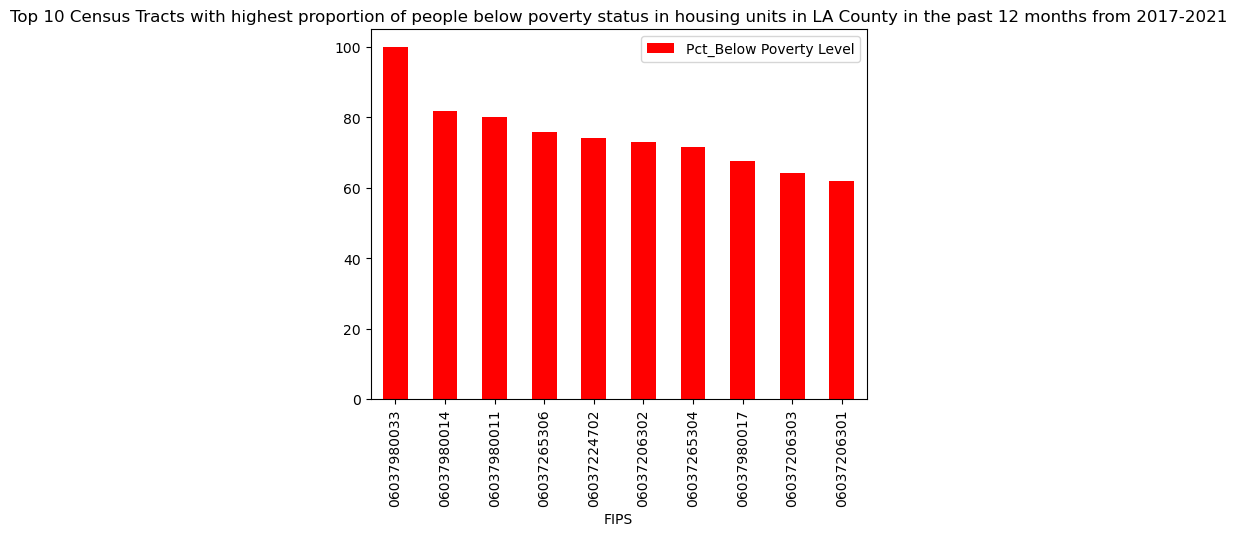

In [21]:
df_sorted_topten.head(10).plot.bar(x='FIPS',   
                            y='Pct_Below Poverty Level', 
                            title='Top 10 Census Tracts with highest proportion of people below poverty status in housing units in LA County in the past 12 months from 2017-2021',
                            color='red')

## Filtering and subsetting data
Let's filter the and subset the data 

In [22]:
# define the cencus tracts with total population = 0
df_nopop = df2[df2['Total']== 0]

print(f'There are {len(df_nopop)} census tracts with no people in them')

There are 27 census tracts with no people in them


In [23]:
# display it
df_nopop[['FIPS','Total']]

FIPS  Total
938   06037265301      0
2058  06037578100      0
2334  06037901003      0
2439  06037920200      0
2459  06037980001      0
2460  06037980002      0
2461  06037980003      0
2462  06037980004      0
2463  06037980005      0
2464  06037980006      0
2465  06037980007      0
2467  06037980009      0
2470  06037980012      0
2471  06037980013      0
2476  06037980018      0
2478  06037980020      0
2480  06037980022      0
2481  06037980023      0
2484  06037980026      0
2485  06037980028      0
2486  06037980030      0
2492  06037980037      0
2493  06037980038      0
2494  06037980039      0
2495  06037990100      0
2496  06037990200      0
2497  06037990300      0

## Simple maps
Let's make beautiful maps and see the allocation of poverty status in people in housing units.


In [24]:
# Read in a geojson file from week 3 course, which was downloaded from the LA Times

tracts=gpd.read_file('Data/Census_Tracts_2020.geojson')
tracts.head()

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


OBJECTID    CT20    LABEL   ShapeSTArea  ShapeSTLength  \
0         1  101110  1011.10  1.229562e+07   15083.854287   
1         2  101122  1011.22  2.845774e+07   31671.455844   
2         3  101220  1012.20  7.522093e+06   12698.783810   
3         4  101221  1012.21  3.812000e+06    9161.710543   
4         5  101222  1012.22  3.191371e+06    9980.600461   

                                            geometry  
0  POLYGON ((-118.28491 34.25948, -118.28492 34.2...  
1  POLYGON ((-118.29015 34.27417, -118.29015 34.2...  
2  POLYGON ((-118.28100 34.25592, -118.28198 34.2...  
3  POLYGON ((-118.28735 34.25591, -118.28863 34.2...  
4  POLYGON ((-118.28594 34.25405, -118.28594 34.2...

<AxesSubplot: >

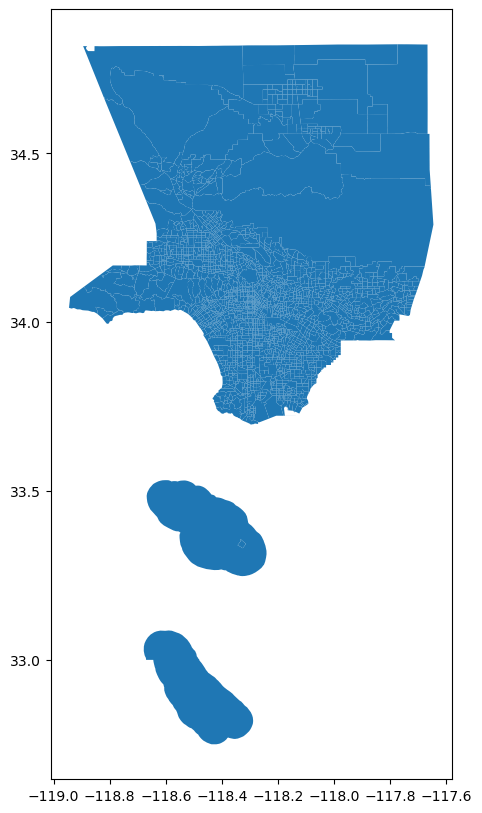

In [25]:
# Plot it
tracts.plot(figsize=(12,10))

we only really need FIPS and geometry, so let's subset the data

In [26]:
# Subset the data
tracts = tracts[['CT20','geometry']]
tracts.head()

CT20                                           geometry
0  101110  POLYGON ((-118.28491 34.25948, -118.28492 34.2...
1  101122  POLYGON ((-118.29015 34.27417, -118.29015 34.2...
2  101220  POLYGON ((-118.28100 34.25592, -118.28198 34.2...
3  101221  POLYGON ((-118.28735 34.25591, -118.28863 34.2...
4  101222  POLYGON ((-118.28594 34.25405, -118.28594 34.2...

In [27]:
# create a FIPS column
tracts['FIPS'] ='06' + '037' + tracts['CT20']
tracts.head()

/opt/conda/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


CT20                                           geometry         FIPS
0  101110  POLYGON ((-118.28491 34.25948, -118.28492 34.2...  06037101110
1  101122  POLYGON ((-118.29015 34.27417, -118.29015 34.2...  06037101122
2  101220  POLYGON ((-118.28100 34.25592, -118.28198 34.2...  06037101220
3  101221  POLYGON ((-118.28735 34.25591, -118.28863 34.2...  06037101221
4  101222  POLYGON ((-118.28594 34.25405, -118.28594 34.2...  06037101222

## Merging/joining data 
Now merging/joining data using column 'FIPS' to make the two dataframes merge together.

In [28]:
# create a new dataframe based on the join
tracts_income = tracts.merge(df2,on="FIPS")
tracts_income.head(3)

CT20                                           geometry         FIPS  \
0  101110  POLYGON ((-118.28491 34.25948, -118.28492 34.2...  06037101110   
1  101122  POLYGON ((-118.29015 34.27417, -118.29015 34.2...  06037101122   
2  101220  POLYGON ((-118.28100 34.25592, -118.28198 34.2...  06037101220   

   Total  Below Poverty Level  At Or Above Poverty Level  \
0   3791                  421                       3370   
1   4216                  260                       3956   
2   3583                  650                       2933   

   Pct_Below Poverty Level  
0                11.105249  
1                 6.166983  
2                18.141222

Create choropleth maps in geopandas. There are three breaks, which are 'natural_breaks', 'equal_interval', 'quantiles'.
Let's try each of them.

<AxesSubplot: >

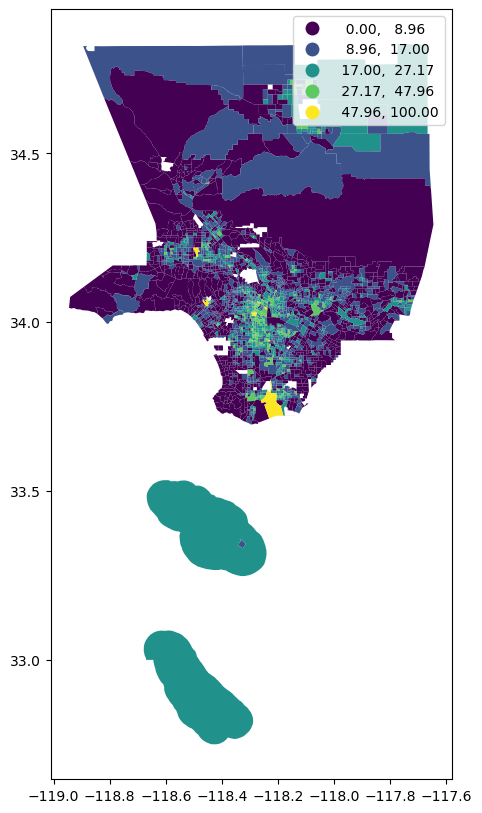

In [29]:
# scheme='NaturalBreaks'
tracts_income.plot(figsize=(12,10),
                 column='Pct_Below Poverty Level',
                 legend=True, 
                 scheme='NaturalBreaks')

<AxesSubplot: >

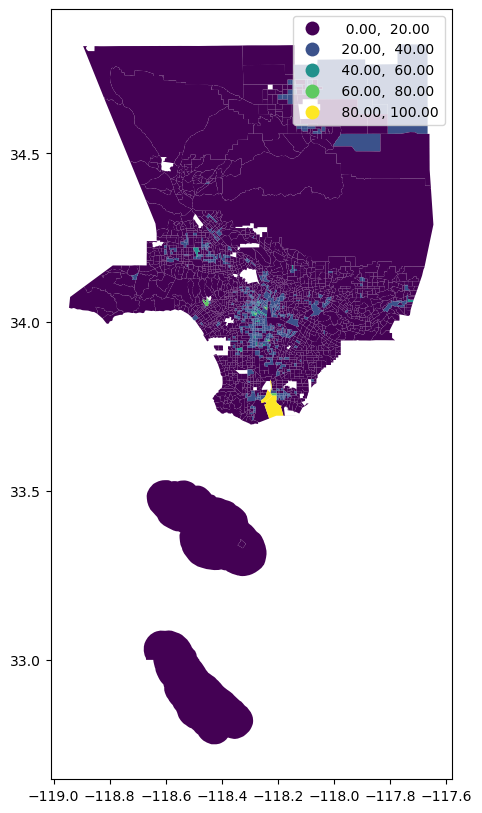

In [30]:
# scheme='equal_interval'
tracts_income.plot(figsize=(12,10),
                 column='Pct_Below Poverty Level',
                 legend=True, 
                 scheme='equal_interval')

<AxesSubplot: >

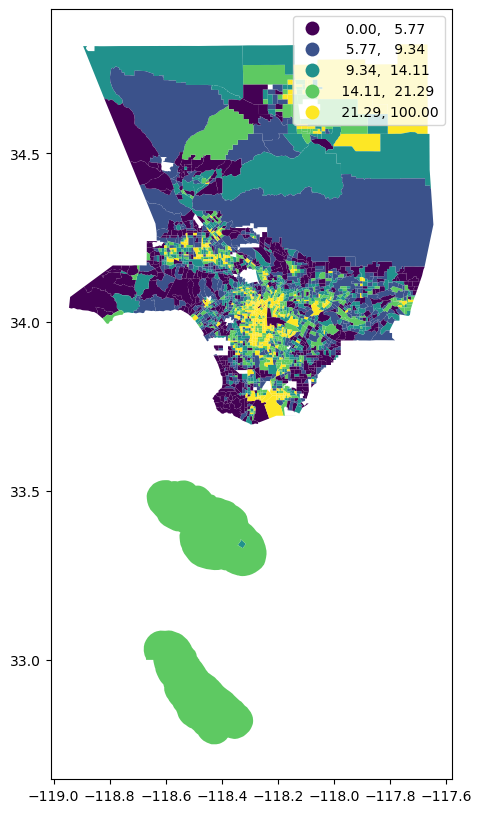

In [31]:
# scheme='quantiles'
tracts_income.plot(figsize=(12,10),
                 column='Pct_Below Poverty Level',
                 legend=True, 
                 scheme='quantiles')

# **LA Census Data Exploration -- Household Income** 

## Importing data

Import `pandas` and `geopandas` to the notebook for further analysis

In [3]:
import geopandas as gpd
import pandas as pd

Name the dataframe as "df" and and apply `pd.read_csv` to read the file. Apply `.head()` to see the data at the first five rows

In [13]:
df = pd.read_csv("Data/R13283028_SL140.csv")
df.head()


Geo_FIPS                                          Geo_QName Geo_FILEID  \
0  6037101110  Census Tract 1011.10, Los Angeles County, Cali...      ACSSF   
1  6037101122  Census Tract 1011.22, Los Angeles County, Cali...      ACSSF   
2  6037101220  Census Tract 1012.20, Los Angeles County, Cali...      ACSSF   
3  6037101221  Census Tract 1012.21, Los Angeles County, Cali...      ACSSF   
4  6037101222  Census Tract 1012.22, Los Angeles County, Cali...      ACSSF   

  Geo_STUSAB  Geo_SUMLEV  Geo_GEOCOMP  Geo_LOGRECNO  Geo_US  Geo_REGION  \
0         ca         140            0          4200     NaN         NaN   
1         ca         140            0          4201     NaN         NaN   
2         ca         140            0          4202     NaN         NaN   
3         ca         140            0          4203     NaN         NaN   
4         ca         140            0          4204     NaN         NaN   

   Geo_DIVISION  ...  SE_A14001_008  SE_A14001_009  SE_A14001_010  \
0           NaN  ...             60             85             43   
1           NaN  ...              0             13              0   
2           NaN  ...             43             55             36   
3           NaN  ...            111             27             97   
4           NaN  ...              0             86             14   

   SE_A14001_011  SE_A14001_012  SE_A14001_013  SE_A14001_014  SE_A14001_015  \
0            149            105            146            210            134   
1             37            200            158            126            194   
2            189             89            134            116             60   
3            112             32            193            207             33   
4             35             44             96              9             81   

   SE_A14001_016  SE_A14001_017  
0            143             90  
1            168            253  
2            140            112  
3            108              0  
4              0             32  

[5 rows x 113 columns]

## Preliminary inspection

Apply `.shape` to understand the number of rows and columns in the df

In [14]:
df.shape

(2498, 113)

## Overwriting default display settings 

There are too many columns which are not shown in the dataframe. Thus, I apply `pd.set_option` to display all the columns and rows

In [15]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head()

Geo_FIPS                                          Geo_QName Geo_FILEID  \
0  6037101110  Census Tract 1011.10, Los Angeles County, Cali...      ACSSF   
1  6037101122  Census Tract 1011.22, Los Angeles County, Cali...      ACSSF   
2  6037101220  Census Tract 1012.20, Los Angeles County, Cali...      ACSSF   
3  6037101221  Census Tract 1012.21, Los Angeles County, Cali...      ACSSF   
4  6037101222  Census Tract 1012.22, Los Angeles County, Cali...      ACSSF   

  Geo_STUSAB  Geo_SUMLEV  Geo_GEOCOMP  Geo_LOGRECNO  Geo_US  Geo_REGION  \
0         ca         140            0          4200     NaN         NaN   
1         ca         140            0          4201     NaN         NaN   
2         ca         140            0          4202     NaN         NaN   
3         ca         140            0          4203     NaN         NaN   
4         ca         140            0          4204     NaN         NaN   

   Geo_DIVISION  Geo_STATECE  Geo_STATE  Geo_COUNTY  Geo_COUSUB  Geo_PLACE  \
0           NaN          NaN          6          37         NaN        NaN   
1           NaN          NaN          6          37         NaN        NaN   
2           NaN          NaN          6          37         NaN        NaN   
3           NaN          NaN          6          37         NaN        NaN   
4           NaN          NaN          6          37         NaN        NaN   

   Geo_TRACT  Geo_BLKGRP  Geo_CONCIT  Geo_AIANHH  Geo_AIANHHFP  Geo_AIHHTLI  \
0     101110         NaN         NaN         NaN           NaN          NaN   
1     101122         NaN         NaN         NaN           NaN          NaN   
2     101220         NaN         NaN         NaN           NaN          NaN   
3     101221         NaN         NaN         NaN           NaN          NaN   
4     101222         NaN         NaN         NaN           NaN          NaN   

   Geo_AITSCE  Geo_AITS  Geo_ANRC  Geo_CBSA  Geo_CSA  Geo_METDIV  Geo_MACC  \
0         NaN       NaN       NaN       NaN      NaN         NaN       NaN   
1         NaN       NaN       NaN       NaN      NaN         NaN       NaN   
2         NaN       NaN       NaN       NaN      NaN         NaN       NaN   
3         NaN       NaN       NaN       NaN      NaN         NaN       NaN   
4         NaN       NaN       NaN       NaN      NaN         NaN       NaN   

   Geo_MEMI  Geo_NECTA  Geo_CNECTA  Geo_NECTADIV  Geo_UA  Geo_UACP  \
0       NaN        NaN         NaN           NaN     NaN       NaN   
1       NaN        NaN         NaN           NaN     NaN       NaN   
2       NaN        NaN         NaN           NaN     NaN       NaN   
3       NaN        NaN         NaN           NaN     NaN       NaN   
4       NaN        NaN         NaN           NaN     NaN       NaN   

   Geo_CDCURR  Geo_SLDU  Geo_SLDL  Geo_VTD  Geo_ZCTA3  Geo_ZCTA5  Geo_SUBMCD  \
0         NaN       NaN       NaN      NaN        NaN        NaN         NaN   
1         NaN       NaN       NaN      NaN        NaN        NaN         NaN   
2         NaN       NaN       NaN      NaN        NaN        NaN         NaN   
3         NaN       NaN       NaN      NaN        NaN        NaN         NaN   
4         NaN       NaN       NaN      NaN        NaN        NaN         NaN   

   Geo_SDELM  Geo_SDSEC  Geo_SDUNI  Geo_UR  Geo_PCI  Geo_TAZ  Geo_UGA  \
0        NaN        NaN        NaN     NaN      NaN      NaN      NaN   
1        NaN        NaN        NaN     NaN      NaN      NaN      NaN   
2        NaN        NaN        NaN     NaN      NaN      NaN      NaN   
3        NaN        NaN        NaN     NaN      NaN      NaN      NaN   
4        NaN        NaN        NaN     NaN      NaN      NaN      NaN   

   Geo_PUMA5  Geo_PUMA1           Geo_GEOID              Geo_NAME  Geo_BTTR  \
0        NaN        NaN  14000US06037101110  Census Tract 1011.10       NaN   
1        NaN        NaN  14000US06037101122  Census Tract 1011.22       NaN   
2        NaN        NaN  14000US06037101220  Census Tract 1012.20       NaN   
3        

## Data types

Apply`.info()` to see the data types. Put `verbose=True, show_counts=True` within because the data has so many columns.

In [16]:
# look at the data types
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 113 columns):
 #    Column         Non-Null Count  Dtype  
---   ------         --------------  -----  
 0    Geo_FIPS       2498 non-null   int64  
 1    Geo_QName      2498 non-null   object 
 2    Geo_FILEID     2498 non-null   object 
 3    Geo_STUSAB     2498 non-null   object 
 4    Geo_SUMLEV     2498 non-null   int64  
 5    Geo_GEOCOMP    2498 non-null   int64  
 6    Geo_LOGRECNO   2498 non-null   int64  
 7    Geo_US         0 non-null      float64
 8    Geo_REGION     0 non-null      float64
 9    Geo_DIVISION   0 non-null      float64
 10   Geo_STATECE    0 non-null      float64
 11   Geo_STATE      2498 non-null   int64  
 12   Geo_COUNTY     2498 non-null   int64  
 13   Geo_COUSUB     0 non-null      float64
 14   Geo_PLACE      0 non-null      float64
 15   Geo_TRACT      2498 non-null   int64  
 16   Geo_BLKGRP     0 non-null      float64
 17   Geo_CONCIT     0 non-null      

## Adjust data types 

We can see that the FIPS codes in 'Geo_FIPS','Geo_STATE','Geo_COUNTY' columns lack "0" in the beginning letter since the data type is interger rather than string. Thus, I convert them to string with `dtype= {'':str,'':str,'': str}`.

In [17]:
df = pd.read_csv(
    'Data/R13283028_SL140.csv',
    dtype=
    {
        'Geo_FIPS':str,
        'Geo_STATE':str,
        'Geo_COUNTY': str
    }
)

Let's check whether there is any difference among those columns with `head()`.

In [18]:
df.head()

Geo_FIPS                                          Geo_QName Geo_FILEID  \
0  06037101110  Census Tract 1011.10, Los Angeles County, Cali...      ACSSF   
1  06037101122  Census Tract 1011.22, Los Angeles County, Cali...      ACSSF   
2  06037101220  Census Tract 1012.20, Los Angeles County, Cali...      ACSSF   
3  06037101221  Census Tract 1012.21, Los Angeles County, Cali...      ACSSF   
4  06037101222  Census Tract 1012.22, Los Angeles County, Cali...      ACSSF   

  Geo_STUSAB  Geo_SUMLEV  Geo_GEOCOMP  Geo_LOGRECNO  Geo_US  Geo_REGION  \
0         ca         140            0          4200     NaN         NaN   
1         ca         140            0          4201     NaN         NaN   
2         ca         140            0          4202     NaN         NaN   
3         ca         140            0          4203     NaN         NaN   
4         ca         140            0          4204     NaN         NaN   

   Geo_DIVISION  Geo_STATECE Geo_STATE Geo_COUNTY  Geo_COUSUB  Geo_PLACE  \
0           NaN          NaN        06        037         NaN        NaN   
1           NaN          NaN        06        037         NaN        NaN   
2           NaN          NaN        06        037         NaN        NaN   
3           NaN          NaN        06        037         NaN        NaN   
4           NaN          NaN        06        037         NaN        NaN   

   Geo_TRACT  Geo_BLKGRP  Geo_CONCIT  Geo_AIANHH  Geo_AIANHHFP  Geo_AIHHTLI  \
0     101110         NaN         NaN         NaN           NaN          NaN   
1     101122         NaN         NaN         NaN           NaN          NaN   
2     101220         NaN         NaN         NaN           NaN          NaN   
3     101221         NaN         NaN         NaN           NaN          NaN   
4     101222         NaN         NaN         NaN           NaN          NaN   

   Geo_AITSCE  Geo_AITS  Geo_ANRC  Geo_CBSA  Geo_CSA  Geo_METDIV  Geo_MACC  \
0         NaN       NaN       NaN       NaN      NaN         NaN       NaN   
1         NaN       NaN       NaN       NaN      NaN         NaN       NaN   
2         NaN       NaN       NaN       NaN      NaN         NaN       NaN   
3         NaN       NaN       NaN       NaN      NaN         NaN       NaN   
4         NaN       NaN       NaN       NaN      NaN         NaN       NaN   

   Geo_MEMI  Geo_NECTA  Geo_CNECTA  Geo_NECTADIV  Geo_UA  Geo_UACP  \
0       NaN        NaN         NaN           NaN     NaN       NaN   
1       NaN        NaN         NaN           NaN     NaN       NaN   
2       NaN        NaN         NaN           NaN     NaN       NaN   
3       NaN        NaN         NaN           NaN     NaN       NaN   
4       NaN        NaN         NaN           NaN     NaN       NaN   

   Geo_CDCURR  Geo_SLDU  Geo_SLDL  Geo_VTD  Geo_ZCTA3  Geo_ZCTA5  Geo_SUBMCD  \
0         NaN       NaN       NaN      NaN        NaN        NaN         NaN   
1         NaN       NaN       NaN      NaN        NaN        NaN         NaN   
2         NaN       NaN       NaN      NaN        NaN        NaN         NaN   
3         NaN       NaN       NaN      NaN        NaN        NaN         NaN   
4         NaN       NaN       NaN      NaN        NaN        NaN         NaN   

   Geo_SDELM  Geo_SDSEC  Geo_SDUNI  Geo_UR  Geo_PCI  Geo_TAZ  Geo_UGA  \
0        NaN        NaN        NaN     NaN      NaN      NaN      NaN   
1        NaN        NaN        NaN     NaN      NaN      NaN      NaN   
2        NaN        NaN        NaN     NaN      NaN      NaN      NaN   
3        NaN        NaN        NaN     NaN      NaN      NaN      NaN   
4        NaN        NaN        NaN     NaN      NaN      NaN      NaN   

   Geo_PUMA5  Geo_PUMA1           Geo_GEOID              Geo_NAME  Geo_BTTR  \
0        NaN        NaN  14000US06037101110  Census Tract 1011.10       NaN   
1        NaN        NaN  14000US06037101122  Census Tract 1011.22       NaN   
2        NaN        NaN  14000US06037101220  Census Tract 1012.20       NaN   
3        NaN    

## Drop/Delete null columns

Now let's find the columns that have all empty values with`.isna().all()`.

In [19]:
df.columns[df.isna().all()].tolist()

['Geo_US',
 'Geo_REGION',
 'Geo_DIVISION',
 'Geo_STATECE',
 'Geo_COUSUB',
 'Geo_PLACE',
 'Geo_BLKGRP',
 'Geo_CONCIT',
 'Geo_AIANHH',
 'Geo_AIANHHFP',
 'Geo_AIHHTLI',
 'Geo_AITSCE',
 'Geo_AITS',
 'Geo_ANRC',
 'Geo_CBSA',
 'Geo_CSA',
 'Geo_METDIV',
 'Geo_MACC',
 'Geo_MEMI',
 'Geo_NECTA',
 'Geo_CNECTA',
 'Geo_NECTADIV',
 'Geo_UA',
 'Geo_UACP',
 'Geo_CDCURR',
 'Geo_SLDU',
 'Geo_SLDL',
 'Geo_VTD',
 'Geo_ZCTA3',
 'Geo_ZCTA5',
 'Geo_SUBMCD',
 'Geo_SDELM',
 'Geo_SDSEC',
 'Geo_SDUNI',
 'Geo_UR',
 'Geo_PCI',
 'Geo_TAZ',
 'Geo_UGA',
 'Geo_PUMA5',
 'Geo_PUMA1',
 'Geo_BTTR',
 'Geo_BTBG',
 'Geo_PLACESE']

Drop those columns with`.dropna`to make the dataframe cleaner and apply `.shape` to see the outcome. 

In [20]:
df = df.dropna(axis=1,how="all")
df.shape

(2498, 70)

Let's see all the columns with `.columns`.

In [21]:
df.columns

Index(['Geo_FIPS', 'Geo_QName', 'Geo_FILEID', 'Geo_STUSAB', 'Geo_SUMLEV',
       'Geo_GEOCOMP', 'Geo_LOGRECNO', 'Geo_STATE', 'Geo_COUNTY', 'Geo_TRACT',
       'Geo_GEOID', 'Geo_NAME', 'SE_A13004_001', 'SE_A13004_002',
       'SE_A13004_003', 'SE_A13004_004', 'SE_A13004_005', 'SE_A13004_006',
       'SE_A13004_007', 'SE_A14018_001', 'SE_A14009_001', 'SE_A14009_002',
       'SE_A14009_003', 'SE_A14009_004', 'SE_A14009_005', 'SE_A14009_006',
       'SE_A14009_007', 'SE_A14009_008', 'SE_A14009_009', 'SE_A14009_010',
       'SE_A10026_001', 'SE_A10026_002', 'SE_A10026_003', 'SE_A10026_004',
       'SE_A10026_005', 'SE_A10026_006', 'SE_A10026_007', 'SE_A10026_008',
       'SE_A10026_009', 'SE_A10026_010', 'SE_A10026_011', 'SE_A10026_012',
       'SE_A10026_013', 'SE_A10026_014', 'SE_A10026_015', 'SE_A10026_016',
       'SE_A10026_017', 'SE_A10026_018', 'SE_A10026_019', 'SE_A10026_020',
       'SE_A10026_021', 'SE_A10026_022', 'SE_A10026_023', 'SE_A14001_001',
       'SE_A14001_002', 'SE_A140

Now I have to define columns I want to keep. From the txt.file, we know that 'SE_A14001_002' to 'SE_A14001_017' are the annual income.
 
 5. Household Income (In <DollarYear> Inflation Adjusted Dollars)
         Universe:  Households
         Name:      A14001
         Variables:
            A14001_001:   Households:
            A14001_002:      Less than $10,000
            A14001_003:      $10,000 to $14,999
            A14001_004:      $15,000 to $19,999
            A14001_005:      $20,000 to $24,999
            A14001_006:      $25,000 to $29,999
            A14001_007:      $30,000 to $34,999
            A14001_008:      $35,000 to $39,999
            A14001_009:      $40,000 to $44,999
            A14001_010:      $45,000 to $49,999
            A14001_011:      $50,000 to $59,999
            A14001_012:      $60,000 to $74,999
            A14001_013:      $75,000 to $99,999
            A14001_014:      $100,000 to $124,999
            A14001_015:      $125,000 to $149,999
            A14001_016:      $150,000 to $199,999
            A14001_017:      $200,000 or More

## Define and Rename columns

Define columns to keep

In [22]:
columns_to_keep = ['Geo_FIPS',
                   'SE_A14001_002',
                   'SE_A14001_003',
                   'SE_A14001_004',
                   'SE_A14001_005',
                   'SE_A14001_006',
                   'SE_A14001_007',
                   'SE_A14001_008',
                   'SE_A14001_009',
                   'SE_A14001_010',
                   'SE_A14001_011',
                   'SE_A14001_012',
                   'SE_A14001_013',
                   'SE_A14001_014',
                   'SE_A14001_015',
                   'SE_A14001_016',
                   'SE_A14001_017',
                  ]

Add it to a new dataframe

In [23]:
df2 = df[columns_to_keep]
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Geo_FIPS       2498 non-null   object
 1   SE_A14001_002  2498 non-null   int64 
 2   SE_A14001_003  2498 non-null   int64 
 3   SE_A14001_004  2498 non-null   int64 
 4   SE_A14001_005  2498 non-null   int64 
 5   SE_A14001_006  2498 non-null   int64 
 6   SE_A14001_007  2498 non-null   int64 
 7   SE_A14001_008  2498 non-null   int64 
 8   SE_A14001_009  2498 non-null   int64 
 9   SE_A14001_010  2498 non-null   int64 
 10  SE_A14001_011  2498 non-null   int64 
 11  SE_A14001_012  2498 non-null   int64 
 12  SE_A14001_013  2498 non-null   int64 
 13  SE_A14001_014  2498 non-null   int64 
 14  SE_A14001_015  2498 non-null   int64 
 15  SE_A14001_016  2498 non-null   int64 
 16  SE_A14001_017  2498 non-null   int64 
dtypes: int64(16), object(1)
memory usage: 331.9+ KB


Now rename the columns. First, create a list of column names as they are now.

In [24]:
columns = list(df2)
columns

['Geo_FIPS',
 'SE_A14001_002',
 'SE_A14001_003',
 'SE_A14001_004',
 'SE_A14001_005',
 'SE_A14001_006',
 'SE_A14001_007',
 'SE_A14001_008',
 'SE_A14001_009',
 'SE_A14001_010',
 'SE_A14001_011',
 'SE_A14001_012',
 'SE_A14001_013',
 'SE_A14001_014',
 'SE_A14001_015',
 'SE_A14001_016',
 'SE_A14001_017']

Replace the values with your desired column names.

In [25]:
df2.columns = ['FIPS',
'< $10,000',
'$10,000-$14,999',
'$15,000-$19,999',
'$20,000-$24,999',
'$25,000-$29,999',
'$30,000-$34,999',
'$35,000-$39,999',
'$40,000-$44,999',
'$45,000-$49,999',
'$50,000-$59,999',
'$60,000-$74,999',
'$75,000-$99,999',
'$100,000-$124,999',
'$125,000-$149,999',
'$150,000-$199,999',
'>$200,000']


Take a look at our new dataframe.

In [26]:
df2.sample(5)

FIPS  < $10,000  $10,000-$14,999  $15,000-$19,999  \
1551  06037482001         28               18               94   
1627  06037503601         23               42               31   
605   06037207901        403               92                0   
1158  06037310705        125              285               99   
1618  06037503106         56               40               25   

      $20,000-$24,999  $25,000-$29,999  $30,000-$34,999  $35,000-$39,999  \
1551                9               13               13               36   
1627                8               27               23               77   
605               102               86                0                0   
1158               56               56               54               15   
1618               13               18               53                0   

      $40,000-$44,999  $45,000-$49,999  $50,000-$59,999  $60,000-$74,999  \
1551                8               28               54               44   
1627               38               52               54               31   
605                 0               51               87               82   
1158               61               30               33              201   
1618              112               77               85               58   

      $75,000-$99,999  $100,000-$124,999  $125,000-$149,999  \
1551              130                 53                107   
1627              205                166                 94   
605               195                156                 60   
1158               80                111                 40   
1618              222                101                 63   

      $150,000-$199,999  >$200,000  
1551                108        184  
1627                174        164  
605                 288        191  
1158                 89         33  
1618                168         85

It seems like there is no total population of each classification. Let's create one! First, I define a new dataframe with the original columns. 

In [27]:
df3 = ['< $10,000',
'$10,000-$14,999',
'$15,000-$19,999',
'$20,000-$24,999',
'$25,000-$29,999',
'$30,000-$34,999',
'$35,000-$39,999',
'$40,000-$44,999',
'$45,000-$49,999',
'$50,000-$59,999',
'$60,000-$74,999',
'$75,000-$99,999',
'$100,000-$124,999',
'$125,000-$149,999',
'$150,000-$199,999',
'>$200,000']

## Add columns 

Then, I sum the rows up to make a new column 'TotalPop' and add it to the dataframe with`.sum(axis = 1)`

In [28]:
df2['TotalPop'] = df2[df3].sum(axis = 1)
df2.head(3)

/tmp/ipykernel_78/337586398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TotalPop'] = df2[df3].sum(axis = 1)


FIPS  < $10,000  $10,000-$14,999  $15,000-$19,999  $20,000-$24,999  \
0  06037101110         54              126               49               33   
1  06037101122         88                0                7               42   
2  06037101220         78               82               28              102   

   $25,000-$29,999  $30,000-$34,999  $35,000-$39,999  $40,000-$44,999  \
0               61                6               60               85   
1               50               36                0               13   
2                7               86               43               55   

   $45,000-$49,999  $50,000-$59,999  $60,000-$74,999  $75,000-$99,999  \
0               43              149              105              146   
1                0               37              200              158   
2               36              189               89              134   

   $100,000-$124,999  $125,000-$149,999  $150,000-$199,999  >$200,000  \
0                210                134                143         90   
1                126                194                168        253   
2                116                 60                140        112   

   TotalPop  
0      1494  
1      1372  
2      1357

Here I want to know the percentage of household fall below poverty level. First, I want to know the average household size.

In [26]:
df3 = pd.read_csv("Data/R13283899_SL140.csv")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df3.head(3)

Geo_FIPS                                          Geo_QName Geo_FILEID  \
0  6037101110  Census Tract 1011.10, Los Angeles County, Cali...      ACSSF   
1  6037101122  Census Tract 1011.22, Los Angeles County, Cali...      ACSSF   
2  6037101220  Census Tract 1012.20, Los Angeles County, Cali...      ACSSF   

  Geo_STUSAB  Geo_SUMLEV  Geo_GEOCOMP  Geo_LOGRECNO  Geo_US  Geo_REGION  \
0         ca         140            0          4200     NaN         NaN   
1         ca         140            0          4201     NaN         NaN   
2         ca         140            0          4202     NaN         NaN   

   Geo_DIVISION  Geo_STATECE  Geo_STATE  Geo_COUNTY  Geo_COUSUB  Geo_PLACE  \
0           NaN          NaN          6          37         NaN        NaN   
1           NaN          NaN          6          37         NaN        NaN   
2           NaN          NaN          6          37         NaN        NaN   

   Geo_TRACT  Geo_BLKGRP  Geo_CONCIT  Geo_AIANHH  Geo_AIANHHFP  Geo_AIHHTLI  \
0     101110         NaN         NaN         NaN           NaN          NaN   
1     101122         NaN         NaN         NaN           NaN          NaN   
2     101220         NaN         NaN         NaN           NaN          NaN   

   Geo_AITSCE  Geo_AITS  Geo_ANRC  Geo_CBSA  Geo_CSA  Geo_METDIV  Geo_MACC  \
0         NaN       NaN       NaN       NaN      NaN         NaN       NaN   
1         NaN       NaN       NaN       NaN      NaN         NaN       NaN   
2         NaN       NaN       NaN       NaN      NaN         NaN       NaN   

   Geo_MEMI  Geo_NECTA  Geo_CNECTA  Geo_NECTADIV  Geo_UA  Geo_UACP  \
0       NaN        NaN         NaN           NaN     NaN       NaN   
1       NaN        NaN         NaN           NaN     NaN       NaN   
2       NaN        NaN         NaN           NaN     NaN       NaN   

   Geo_CDCURR  Geo_SLDU  Geo_SLDL  Geo_VTD  Geo_ZCTA3  Geo_ZCTA5  Geo_SUBMCD  \
0         NaN       NaN       NaN      NaN        NaN        NaN         NaN   
1         NaN       NaN       NaN      NaN        NaN        NaN         NaN   
2         NaN       NaN       NaN      NaN        NaN        NaN         NaN   

   Geo_SDELM  Geo_SDSEC  Geo_SDUNI  Geo_UR  Geo_PCI  Geo_TAZ  Geo_UGA  \
0        NaN        NaN        NaN     NaN      NaN      NaN      NaN   
1        NaN        NaN        NaN     NaN      NaN      NaN      NaN   
2        NaN        NaN        NaN     NaN      NaN      NaN      NaN   

   Geo_PUMA5  Geo_PUMA1           Geo_GEOID              Geo_NAME  Geo_BTTR  \
0        NaN        NaN  14000US06037101110  Census Tract 1011.10       NaN   
1        NaN        NaN  14000US06037101122  Census Tract 1011.22       NaN   
2        NaN        NaN  14000US06037101220  Census Tract 1012.20       NaN   

   Geo_BTBG  Geo_PLACESE  SE_A10003_001  SE_A10002B_001  SE_A10002B_002  \
0       NaN          NaN           2.54             644             200   
1       NaN          NaN           3.09             344             116   
2       NaN          NaN           2.64             762             261   

   SE_A10002B_003  SE_A10002B_004  SE_A10002B_005  SE_A10002B_006  \
0             234              86              97              21   
1              43              48              36              24   
2             256              71              63              80   

   SE_A10002B_007  SE_A10002B_008  ACS21_5yr_B25009001  ACS21_5yr_B25009002  \
0               6               0                 1494                  850   
1              77               0                 1372                 1028   
2              14              17                 1357                  595   

   ACS21_5yr_B25009003  ACS21_5yr_B25009004  ACS21_5yr_B25009005  \
0                  135                  238                  329   
1                  173                  359                  147   
2                  171                  145                  120   

   ACS21_5yr_B25009006  ACS21_5yr_B25009007  ACS21_5yr_B25009008

Select the column represents the average household size

In [27]:
df_householdsize = df3['SE_A10003_001']
df_householdsize.sample(10)

24      4.66
2179    1.97
2395    3.58
625     2.51
1289    4.14
1345    3.29
1910    2.90
2091    4.25
638     2.63
2387    3.88
Name: SE_A10003_001, dtype: float64

Let's see the basic info of the household size 

In [28]:
df_householdsize.describe()

count    2469.000000
mean        3.058429
std         0.769966
min         1.050000
25%         2.530000
50%         3.010000
75%         3.590000
max         7.760000
Name: SE_A10003_001, dtype: float64

The mean and the median household size roughly fall on 3. To make the analysis easier, I use 3 as average household size to proceed the analysis of poverty percentage. According to the U.S. Department of Health and Human Services (HHS), Federal Poverty Level of a household of 3 in Los Angeles, 2022 is $23,030. The category closest to $23,030 is $20,000−$24,999.  Thus, we use $20,000−$24,999 as a threshold to see the percentage of poverty in each census tract. 

Source: https://www.laalmanac.com/social/so24.php

Let's create a new column called "poverty"

In [33]:
df2['poverty'] = df2['< $10,000'] + df2['$10,000-$14,999'] + df2['$15,000-$19,999'] + df2['$20,000-$24,999'] 
df2.sample(5)

/tmp/ipykernel_552/214817986.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['poverty'] = df2['< $10,000'] + df2['$10,000-$14,999'] + df2['$15,000-$19,999'] + df2['$20,000-$24,999']


FIPS  < $10,000  $10,000-$14,999  $15,000-$19,999  \
237   06037127220         85              185               84   
2005  06037574500         65               27               49   
2071  06037600702         54               77               20   
1465  06037460900         92                9               68   
561   06037203710         44               23               36   

      $20,000-$24,999  $25,000-$29,999  $30,000-$34,999  $35,000-$39,999  \
237                88              103               70              132   
2005               48               55               32                0   
2071               43                4               67               56   
1465              127               78               22               32   
561                33               39               22               42   

      $40,000-$44,999  $45,000-$49,999  $50,000-$59,999  $60,000-$74,999  \
237                95               49               80              196   
2005               30               34               55              143   
2071               85               70               82               30   
1465                7               39               83              278   
561                48               16               51              137   

      $75,000-$99,999  $100,000-$124,999  $125,000-$149,999  \
237               106                 86                 65   
2005              445                139                149   
2071              188                184                224   
1465              303                257                141   
561               115                 92                 49   

      $150,000-$199,999  >$200,000  TotalPop  poverty  
237                 108        149      1681      442  
2005                362        633      2266      189  
2071                152        201      1537      194  
1465                192        182      1910      296  
561                  51         34       832      136

Then, create a new column 'pct_poverty', which divides 'poverty' by 'TotalPop'

In [65]:
df2['pct_poverty'] = df2['poverty']/df2['TotalPop']*100
df2.sample(5)

/tmp/ipykernel_552/2022362464.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['pct_poverty'] = df2['poverty']/df2['TotalPop']*100


FIPS  < $10,000  $10,000-$14,999  $15,000-$19,999  \
2282  06037703200         72               29               33   
1778  06037540800         65              130               27   
1559  06037482304        108               31               47   
1895  06037553901         19               45               39   
1904  06037554204        116              115              208   

      $20,000-$24,999  $25,000-$29,999  $30,000-$34,999  $35,000-$39,999  \
2282              153                0               27               90   
1778                0               65               24               17   
1559               11               61               19               64   
1895               97               69               27              110   
1904               51               83              168               91   

      $40,000-$44,999  $45,000-$49,999  $50,000-$59,999  $60,000-$74,999  \
2282               33               69              110              309   
1778               45               92               72              221   
1559               44               49               75               59   
1895               30               19              126              132   
1904               55               52              141              282   

      $75,000-$99,999  $100,000-$124,999  $125,000-$149,999  \
2282              256                366                178   
1778              168                147                190   
1559               96                 47                 45   
1895              438                113                124   
1904              141                148                 30   

      $150,000-$199,999  >$200,000  TotalPop  poverty  pct_poverty  
2282                196        272      2193      287    13.087095  
1778                 60        133      1456      222    15.247253  
1559                 27          0       783      197    25.159642  
1895                117         43      1548      200    12.919897  
1904                116         13      1810      490    27.071823

## Simple plots

Let's make some plots! First, plot 'pct_poverty' as a historgram with 50 bins.

<AxesSubplot: ylabel='Frequency'>

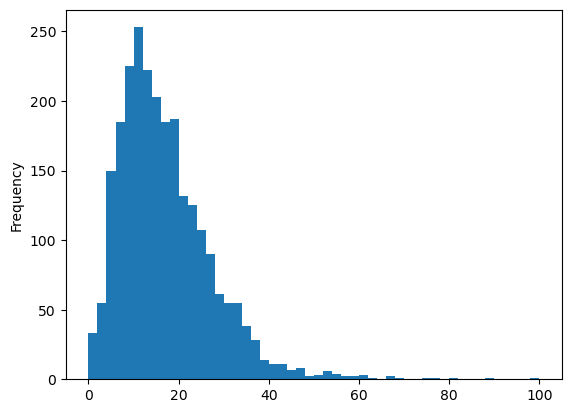

In [66]:
df2['pct_poverty'].plot.hist(bins=50)

Let's see the plotbox now.

<AxesSubplot: >

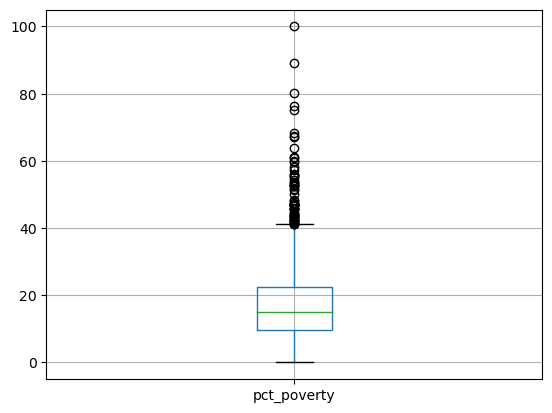

In [67]:
df2.boxplot(column=['pct_poverty'])

What are the top ten poorest cencus tracts in LA? Use `.sort_values` to find the answer

In [68]:
df_sorted = df2.sort_values(by='pct_poverty',ascending = False)
df_sorted[['FIPS','pct_poverty']].head(10)

FIPS  pct_poverty
2488  06037980033   100.000000
588   06037206301    89.275635
589   06037206302    80.190174
590   06037206303    76.470588
2469  06037980011    75.000000
2475  06037980017    68.421053
771   06037224702    67.293777
595   06037207304    67.005380
598   06037207307    63.910422
942   06037265307    61.126761

Plot it

<AxesSubplot: xlabel='FIPS'>

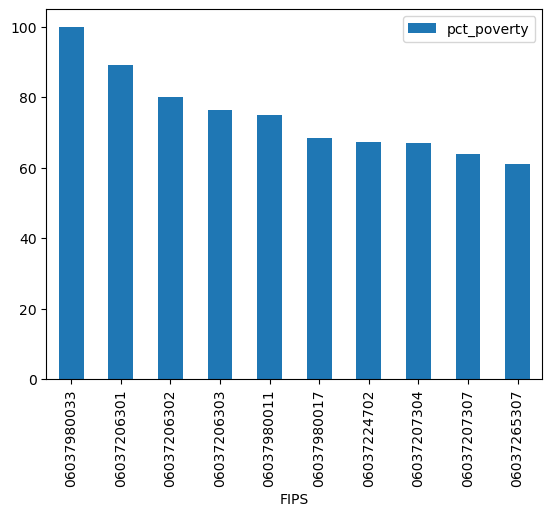

In [69]:
df_sorted.head(10).plot.bar(x='FIPS',
                            y='pct_poverty')

Make it prettier with a title

<AxesSubplot: title={'center': 'Top 10 Census Tracts with Poorest Population in Los Angeles County in from 2017-2021'}, ylabel='FIPS'>

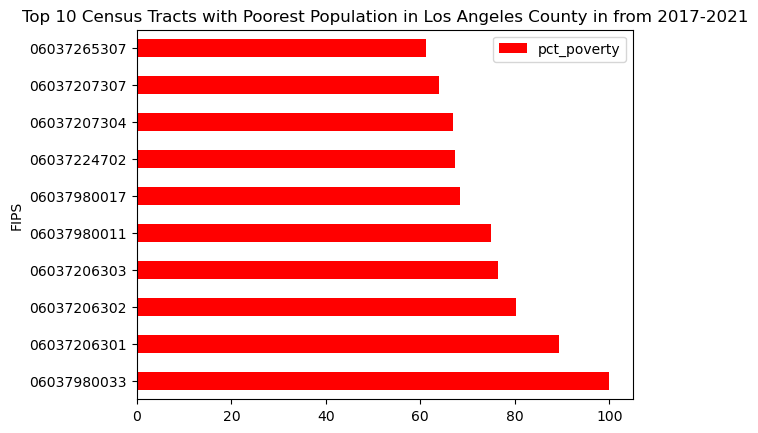

In [70]:
df_sorted.head(10).plot.barh(x='FIPS',  # barh turns the plot direction 
                            y='pct_poverty', 
                            title='Top 10 Census Tracts with Poorest Population in Los Angeles County in from 2017-2021',
                            color='red')

## Filtering and subsetting data

Let's filter the data which total population = 0

In [71]:
df_nopop = df2[df2['TotalPop']== 0]
df_nopop

FIPS  < $10,000  $10,000-$14,999  $15,000-$19,999  \
938   06037265301          0                0                0   
2058  06037578100          0                0                0   
2334  06037901003          0                0                0   
2439  06037920200          0                0                0   
2459  06037980001          0                0                0   
2460  06037980002          0                0                0   
2461  06037980003          0                0                0   
2462  06037980004          0                0                0   
2463  06037980005          0                0                0   
2464  06037980006          0                0                0   
2465  06037980007          0                0                0   
2467  06037980009          0                0                0   
2470  06037980012          0                0                0   
2471  06037980013          0                0                0   
2476  06037980018          0                0                0   
2478  06037980020          0                0                0   
2480  06037980022          0                0                0   
2481  06037980023          0                0                0   
2484  06037980026          0                0                0   
2485  06037980028          0                0                0   
2486  06037980030          0                0                0   
2492  06037980037          0                0                0   
2493  06037980038          0                0                0   
2494  06037980039          0                0                0   
2495  06037990100          0                0                0   
2496  06037990200          0                0                0   
2497  06037990300          0                0                0   

      $20,000-$24,999  $25,000-$29,999  $30,000-$34,999  $35,000-$39,999  \
938                 0                0                0                0   
2058                0                0                0                0   
2334                0                0                0                0   
2439                0                0                0                0   
2459                0                0                0                0   
2460                0                0                0                0   
2461                0                0                0                0   
2462                0                0                0                0   
2463                0                0                0                0   
2464                0                0                0                0   
2465                0                0                0                0   
2467                0                0                0                0   
2470                0                0                0                0   
2471                0                0                0                0   
2476                0                0                0                0   
2478                0                0                0                0   
2480                0                0                0                0   
2481                0                0                0                0   
2484                0                0                0                0   
2485                0                0                0                0   
2486                0                0                0                0   
2492                0                0                0                0   
2493                0                0                0                0   
2494                0                0                0                0   
2495                0                0                0                0   
2496                0                0                0                0   
2497                0                0                0                0   

      $40,000-$44,999  $45,000-$49,

In [72]:
print(f'There are {len(df_nopop)} census tracts with no people in them')

There are 27 census tracts with no people in them


In [73]:
df_nopop[['FIPS','TotalPop']]

FIPS  TotalPop
938   06037265301         0
2058  06037578100         0
2334  06037901003         0
2439  06037920200         0
2459  06037980001         0
2460  06037980002         0
2461  06037980003         0
2462  06037980004         0
2463  06037980005         0
2464  06037980006         0
2465  06037980007         0
2467  06037980009         0
2470  06037980012         0
2471  06037980013         0
2476  06037980018         0
2478  06037980020         0
2480  06037980022         0
2481  06037980023         0
2484  06037980026         0
2485  06037980028         0
2486  06037980030         0
2492  06037980037         0
2493  06037980038         0
2494  06037980039         0
2495  06037990100         0
2496  06037990200         0
2497  06037990300         0

## Simple Maps

Read in a geojson file from week 3 course, which was downloaded from the LA Times

In [5]:
tracts=gpd.read_file('Data/Census_Tracts_2020.geojson')
tracts.head()

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


OBJECTID    CT20    LABEL   ShapeSTArea  ShapeSTLength  \
0         1  101110  1011.10  1.229562e+07   15083.854287   
1         2  101122  1011.22  2.845774e+07   31671.455844   
2         3  101220  1012.20  7.522093e+06   12698.783810   
3         4  101221  1012.21  3.812000e+06    9161.710543   
4         5  101222  1012.22  3.191371e+06    9980.600461   

                                            geometry  
0  POLYGON ((-118.28491 34.25948, -118.28492 34.2...  
1  POLYGON ((-118.29015 34.27417, -118.29015 34.2...  
2  POLYGON ((-118.28100 34.25592, -118.28198 34.2...  
3  POLYGON ((-118.28735 34.25591, -118.28863 34.2...  
4  POLYGON ((-118.28594 34.25405, -118.28594 34.2...

plot it

<AxesSubplot: >

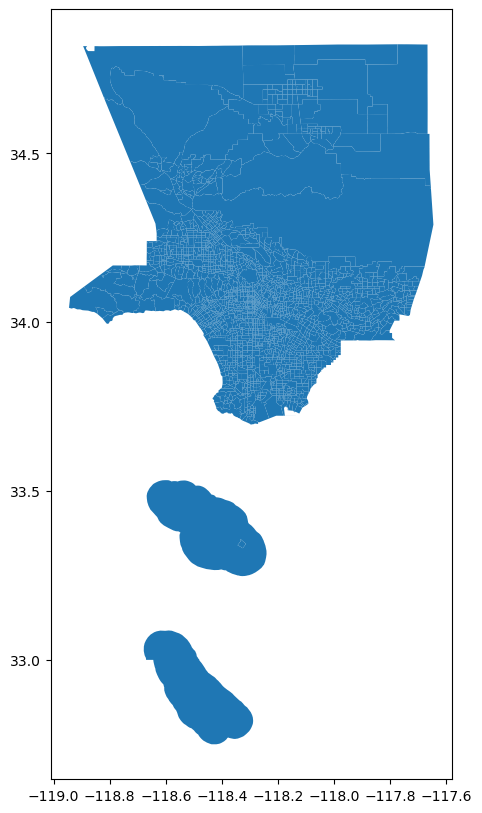

In [6]:
tracts.plot(figsize=(12,10))

we only really need FIPS and geometry, so let's subset the data

In [7]:
tracts = tracts[['CT20','geometry']]
tracts.head()

CT20                                           geometry
0  101110  POLYGON ((-118.28491 34.25948, -118.28492 34.2...
1  101122  POLYGON ((-118.29015 34.27417, -118.29015 34.2...
2  101220  POLYGON ((-118.28100 34.25592, -118.28198 34.2...
3  101221  POLYGON ((-118.28735 34.25591, -118.28863 34.2...
4  101222  POLYGON ((-118.28594 34.25405, -118.28594 34.2...

create a FIPS column

In [8]:
tracts['FIPS'] ='06' + '037' + tracts['CT20']
tracts.head()

/opt/conda/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


CT20                                           geometry         FIPS
0  101110  POLYGON ((-118.28491 34.25948, -118.28492 34.2...  06037101110
1  101122  POLYGON ((-118.29015 34.27417, -118.29015 34.2...  06037101122
2  101220  POLYGON ((-118.28100 34.25592, -118.28198 34.2...  06037101220
3  101221  POLYGON ((-118.28735 34.25591, -118.28863 34.2...  06037101221
4  101222  POLYGON ((-118.28594 34.25405, -118.28594 34.2...  06037101222

## Merging/joining data 
Now merging/joining data using column 'FIPS' to make the two dataframes merge together.

In [29]:
# create a new dataframe based on the join
tracts_income = tracts.merge(df2,on="FIPS")
tracts_income.head(3)

CT20                                           geometry         FIPS  \
0  101110  POLYGON ((-118.28491 34.25948, -118.28492 34.2...  06037101110   
1  101122  POLYGON ((-118.29015 34.27417, -118.29015 34.2...  06037101122   
2  101220  POLYGON ((-118.28100 34.25592, -118.28198 34.2...  06037101220   

   < $10,000  $10,000-$14,999  $15,000-$19,999  $20,000-$24,999  \
0         54              126               49               33   
1         88                0                7               42   
2         78               82               28              102   

   $25,000-$29,999  $30,000-$34,999  $35,000-$39,999  $40,000-$44,999  \
0               61                6               60               85   
1               50               36                0               13   
2                7               86               43               55   

   $45,000-$49,999  $50,000-$59,999  $60,000-$74,999  $75,000-$99,999  \
0               43              149              105              146   
1                0               37              200              158   
2               36              189               89              134   

   $100,000-$124,999  $125,000-$149,999  $150,000-$199,999  >$200,000  \
0                210                134                143         90   
1                126                194                168        253   
2                116                 60                140        112   

   TotalPop  
0      1494  
1      1372  
2      1357

Now create choropleth maps in geopandas. There are three breaks, which are 'natural_breaks', 'equal_interval', 'quantiles'.
Let's try each of them.

<AxesSubplot: >

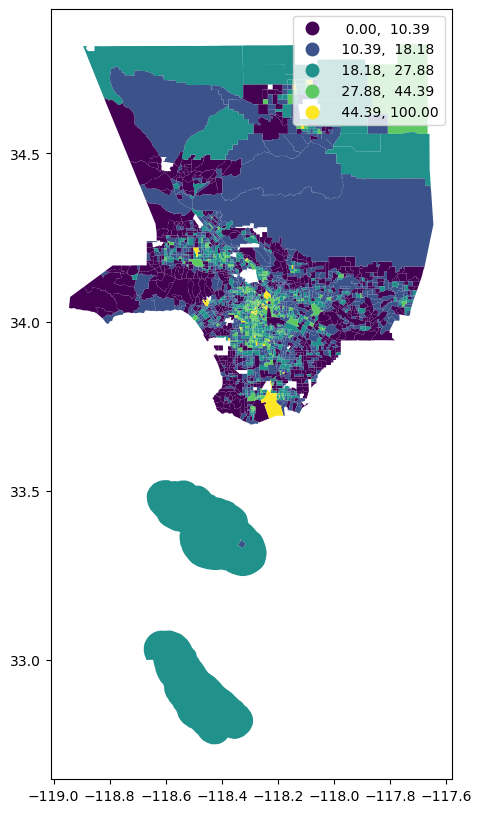

In [60]:
# scheme='NaturalBreaks'
tracts_income.plot(figsize=(12,10),
                 column='pct_poverty',
                 legend=True, 
                 scheme='NaturalBreaks')

<AxesSubplot: >

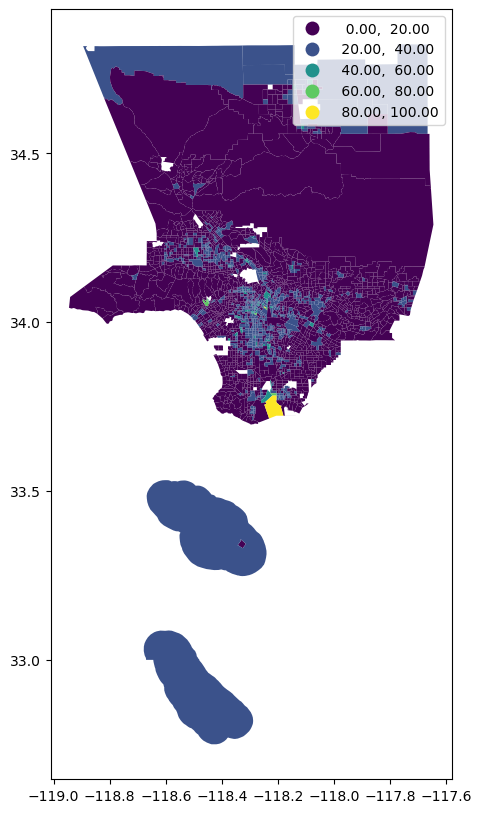

In [61]:
# scheme='equal_interval'
tracts_income.plot(figsize=(12,10),
                 column='pct_poverty',
                 legend=True, 
                 scheme='equal_interval')

<AxesSubplot: >

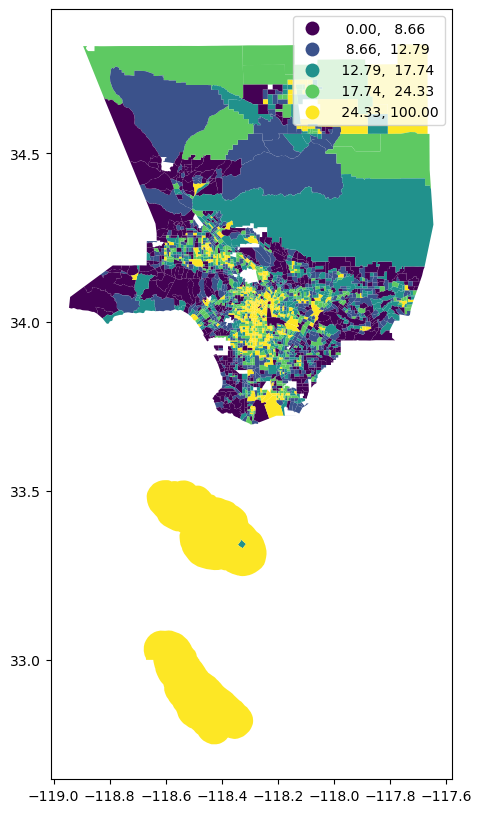

In [62]:
# scheme='quantiles'
tracts_income.plot(figsize=(12,10),
                 column='pct_poverty',
                 legend=True, 
                 scheme='quantiles')

This is the prelimary analysis of LA household income. Thanks!